# Project: Operation Orphan's Rubbish Science expansion in Kenya

#### Project Goal

The goal of our project was to help Operation Orphan, a charity focused on increasing educational opportunities for children coming from poor backgrounds or who lost their primary care givers, in identifying whether there would be a need for their project, Rubbish Science, in Kenya.
We looked at:
- trash availability
- access to education
- disease incidence

and tried to put all of the above together in a recommandation for the charity.

Rubbish Science helps children upcycle trash they find in their community to address issues - such as lack of nutrition for example through hydroponic farms or fishing nets -, in the meantime teaching them science and empowering them to improve their living standards. The project is also applying for funding to provide yearly scholarships all the way to university for children with high potential.

#### Project Requiremens fulfilled
- used pandas, matplotlib and numpy
- all the data we used is available in csv format and was cleaned before analysis
- we used more than one API

#### Extra features
- used plotly and seaborn as an extension to the matplotlib visualization tools
- made use of functions
- used logging
- saved figures to files (i.e., png format)
- renamed dataframe columns
- used lambda functions
- created choropleth maps using geopandas
- used subplots, heatmaps, timeseries and box plots
- attempted to work with a ml model
- used list comprehensions

#### Recommendations
We think Operation Orphan should expand to Kenya with their Rubbish Science project as:
- rubbish is readily available due to the government's inability to provide a solution for a more efficient and safe way of disposing of solid waste. Instead waste is disposed of mixed and haphazardly
- education drops after primary school, which we expect to be related to the high poverty levels experienced by the population. About 35% of the Kenyan population is expected to live below the international poverty line (live with less than 1.90 dollars per day) according to [2016 data](https://borgenproject.org/tag/poverty-in-kenya/#:~:text=Around%2035.5%25%20of%20Kenya's%20population,the%20population%20living%20in%20poverty). What is more, we know that the [Free Primary Education Act](https://files.eric.ed.gov/fulltext/EJ1080614.pdf) was introduced by the Kenyan government in 2003 making primary education available for all. We also know that the [cost](https://core.ac.uk/download/pdf/328024327.pdf) of the cheapest secondary education is around 400 dollars per year, a sum not attainable for someone living on less than 1.90 dollars per day. This information explains the drop in education enrollment we see between primary and secondary school, drop that continues with higher levels of education.
- the education attendance is slightly skewed towards males, but would recommend more granular researcg before suggesting targetting sub-populations based on gender
- based on our choropleth maps we recommend that the counties in the west, south east and north east should be the initial areas targeted by Rubbish Science, as they have a lower secondary education attendance percentage than was expected for the population of the counties
- based on our health research we specifically recommend Rubbish Science to include practical diy experiments around making mosquito traps (to address malaria incidence) and water cleansing (i.e., through sunlight and sun uv exposure to address water-borne diseases), both of which our research found to have high incidence

#### Limitations and decisions in our analysis
- Our initial goal was to compare Kenya data to data for countries where Operation Orphan already operates (i.e., Vietnam and Sierra Leone). However the data was too scarce (e.g., World Bank data) to allow us to perform a thorough  study
- We could not find any data sets for trash for Kenya, so the trash part of our report is research-based
- We acknowledge that for health data there are more things we could have looked at (e.g., nutrition levels) but we identified that continuing to look into health data would have used the same skills we already applied throughout the below study, so we decided to limit it to 2 conditions (i.e., malaria and water-born diseases)
- Missing some of the metadata/background for how some of the numbers were measured and reported - e.g., Basic Literacy numbers for the education data - 22 for example is a small number if it is for the entire population included in the census when for same county we have 30,000 children in primary school alone
- More variables need to be analyzed for malaria to identify the factor with the most weight in bringing the incidence down. Bed nets alone did not lead to convincing results
- The data didn't allow us to continue with the ml model training unfortunately. If we had more time, we would have looked to see what other per region data we could have got that might have allowed us to continue with the ml model (e.g., we were thinking of looking at climate/humidity data and malaria data to see if any correlations would be apparent).

# Rubbish situation in Kenya
A research paper published in 2020 found that, for example in one of the Kenya counties, Mombasa:
- approximately 2,200 tons of waste are generated, out of which only 65% (1,430 tons) are collected
- only 13% of households have access to the county's waste management services due to mismanaged primary collection points, low in number (only 9) and inadequate since placed only near roads and formal settlements

The above led to the emergence of informal collection points and exposed the residents to communicable diseases. [source](https://www.sciencedirect.com/science/article/pii/S2226585619301256)

Accordingly, 74% of the respondents used in the study have reservations regarding the waste management conduct and practices as currently practised by the local authority — the study found waste management practices in Mombasa are viewed as a more of a privatization drive instead of being motivated by solving the garbage problem. In our opinion, lack of trust in the local authority could hinder Rubbish Science if developed in conjunction with them HOWEVER the program’s aim is not money-oriented: it is driven by education and self-sufficiency.

The safe and efficient management of solid waste is of utmost importance, and has limitations for our proposal, as non-solid rubbish could be contaminated and therefore unhygienic.

This study found that household size has a negative correlation with:
- proximity to the collection points
- waste management expenditure
- waste management behaviour (attitude)
- exposure to (communicable) diseases

Thus, these relationship(s) depict that the larger the household size, the nearer the household is to the primary collection points, the more is spent on waste management, the higher the tendency to haphazardly dispose off waste and the higher the risk of exposure to communicable diseases.

The relationship between household size and air quality is a direct and positive one. Implying that household(s) with a shrinking population tend to reside in areas that they perceive to have good air quality. What this means for us in practical/project terms? In theory that because larger groups of people living together (likely families) are more affected, they also stand more to benefit. Will be “easier” to expand the project.

Waste transportation is also a big problem. Currently it is conducted by trucks, hand carts, donkey carts, alongside adopted appropriate transportation trucks, and/or privatized waste management through public private partnerships (PPP) in some areas. Waste disposal is also a concern since open dumping mixed waste is common solution at the moment becuase there is no better solution available. The Kenyan government’s Vision 2030 aims to have “fully functional and compliant waste management systems, by developing strategies towards achieving sustainable waste” and is underway in 5 cities including Mombasa. [source](https://www.nema.go.ke/images/Docs/Selelah_OilandGas/Waste%20Management%20Guidelines%20for%20O&G%20sector_120320-min.pdf)

In [1]:
# imports that will be used throughout the rest of the notebook
# scientific packages 
import pandas as pd
import numpy as np
from sklearn import preprocessing

# visualization packages
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# general packages
import requests
import logging
import urllib.request
import json
from pprint import pprint
from datetime import datetime
from collections import defaultdict
import pyodata
import string

# Education

#### Data and Analysis
In the following section we'll analyze education data from 2016 from [Kenya Open Data](https://www.opendata.go.ke/datasets/bbcd64cbce5347189ead08c23d6a0d38/explore)

#### Collect the raw data

In [2]:
# set up logging
logging.basicConfig(level=logging.INFO)

In [3]:
def get_api_data(link):
    try:
        response = requests.get(link)
        logging.info("Your API response was {}. I got the info :)".format(response.status_code))
        return response.json()
    except requests.exceptions.Timeout:
        logging.warning("Your API response was {}. Trying again...".format(response.status_code))
        return get_api_data(link) # retry recursively
    except requests.exceptions.TooManyRedirects:
        logging.error("Your API response was {}. Your url {} might not have been correct".format(response.status_code, link))
        return # the None returned will lead to issues down the line for the user
               # when trying to access the data - the logging will hopefully make the process
               # a bit less painful
    except:
        logging.critical("Well not sure what happened there. Maybe take a look at requests.get() in get_api_data()")
        return

In [4]:
# Opendata Kenya School stats per region
data = get_api_data('https://opendata.arcgis.com/datasets/bbcd64cbce5347189ead08c23d6a0d38_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')
#data = get_api_data('https://bla') # test that the logging works

INFO:root:Your API response was 200. I got the info :)


In [5]:
# creating the df using the data from the api
district_data = []
index = 1
for i in data['features']:
    district_data.append(pd.DataFrame(i['attributes'], index = [index])) # i['attributes'] is basically the data for a row
    index += 1
df = pd.concat(district_data)

In [6]:
# checking we see the data - we see it's per region, per urban/rural, per gender
df.head()

_District Rural_/_Urban Male_/_Female  \
1    TURKANA SOUTH         Urban          Male   
2  NYANDARUA NORTH         Rural          Male   
3  NYANDARUA NORTH         Rural        Female   
4  NYANDARUA SOUTH         Rural          Male   
5  NYANDARUA SOUTH         Rural        Female   

  In_school_with_pre-primary_as_percent_of_pre-primary_population  \
1                                               None                
2                                            114.34%                
3                                            113.68%                
4                                             96.18%                
5                                             93.98%                

  In_school_with_Primary_education_as_%_of_primary_school_age_population  \
1                                               None                       
2                                            118.51%                       
3                                            116.56%                       
4                                            120.32%                       
5                                            118.71%                       

  In_school_with_Secondary_education_as_percent_of_secondary_school_age_population  \
1                                               None                                 
2                                             64.27%                                 
3                                             69.31%                                 
4                                              52.6%                                 
5                                              57.5%                                 

  In_school_with_Tertiary_education_as_%_of_population  \
1                                               None     
2                                              5.99%     
3                                              7.66%     
4                                              3.55%     
5                                              3.86%     

  University_students_as_%_of_population  \
1                                   None   
2                                  2.18%   
3                                  1.46%   
4                                  2.17%   
5                                  1.23%   

  Youth_Polytechnic_students_as_percent_of_population  \
1                                               None    
2                                              1.44%    
3                                              0.58%    
4                                              0.73%    
5                                              0.65%    

  %_of_people_with_over_3_years_Basic_Literacy  ... Tertiary_age_population  \
1                                         None  ...                       0   
2                                        0.04%  ...                    9533   
3                                        0.12%  ...                    8738   
4                                        0.06%  ...                   11582   
5                                         0.1%  ...                   11177   

      County     Province                                       Census_Table  \
1    Turkana  RIFT VALLEY  Table 3a: Rural  Population, 3 years and above...   
2  Nyandarua      CENTRAL  Table 3b: Urban Population, 3 years and above ...   
3  Nyandarua      CENTRAL  Table 3b: Urban Population, 3 years and above ...   
4  Nyandarua      CENTRAL  Table 3b: Urban Population, 3 years and above ...   
5  Nyandarua      CENTRAL  Table 3b: Urban Population, 3 years and above ...   

                   MTEF_Sector              MTP_Sector  Longtitude  Latitude  \
1  Human resources development  Education and Training   35.999795  2.078370   
2  Human resources development  Education and Training   36.423431 -0.144561   
3  Human resources development  Education and Training   36.423431 -0.144561   
4  Human resources development  Education and Training   36.556513 -0.533045   
5  Hum

In [7]:
# save data to csv
df.to_csv('new_data/school_data.csv')

#### Loading the data

In [8]:
# load data from csv
school_data = pd.read_csv('data/school_data.csv', index_col = 'Unnamed: 0')

#### Inspecting and cleaning the data

In [9]:
school_data.shape

(632, 34)

In [10]:
school_data.columns.values

array(['_District', 'Rural_/_Urban', 'Male_/_Female',
       'In_school_with_pre-primary_as_percent_of_pre-primary_population',
       'In_school_with_Primary_education_as_%_of_primary_school_age_population',
       'In_school_with_Secondary_education_as_percent_of_secondary_school_age_population',
       'In_school_with_Tertiary_education_as_%_of_population',
       'University_students_as_%_of_population',
       'Youth_Polytechnic_students_as_percent_of_population',
       '%_of_people_with_over_3_years_Basic_Literacy',
       'Students_in_Madrassa_school_as_percent_of_school_age_children',
       'No_of_people_over_3_years_in_school_with_Pre-Primary_education',
       'No_of_people_over_3_years_in_school_with_Primary_education',
       'No_of_people_over_3_years_in_school_with_Secondary_education',
       'No_of_people_over_3_years_in_school_with_Tertiary_education',
       'No_of_people_over_3_years_in_University', 'Youth_Polytechnic',
       'No_of_people_over_3_years_with_Basic_

The column names are a bit long so let's try to rename them. The mapping of the main data points looks like follows:
- **Env**: will identify if the data is rural or urban
- **Gender**: only 2 genders were identified - male or female
- **%Primary**: percentage of children in primary education from the children of pre-primary education age
- **%Secondary**: percentage of children in secondary education from the children of pre-primary education age
- **%Tertiary**: percentage of children in tertiary education from the children of pre-primary education age
- **%Uni**: percentage of children in uni education from the children of pre-primary education age
- **%Poly**: percentage of children in youth polytechnic education from the children of pre-primary education age
- **%BLiteracy**: percentage of people with over 3 years of Basic Literacy
- **#Primary**: number of children in primary education from the children of pre-primary education age
- **#Secondary**: number of children in secondary education from the children of pre-primary education age
- **#Tertiary**: number of children in tertiary education from the children of pre-primary education age
- **#Uni**: number of children in uni education from the children of pre-primary education age
- **#Poly**: number of children in youth polytechnic education from the children of pre-primary education age
- **#BLiteracy**: number of people with over 3 years of Basic Literacy
- **Population**: number of people in county (separated by env and gender)
- **County**: county (Kenya has 47 counties)

In [11]:
# hardcoding a mapping for the renaming - using as a global var
ed_rename_mapping = {'Rural_/_Urban': 'Env', 'Male_/_Female': 'Gender',
                       'In_school_with_pre-primary_as_percent_of_pre-primary_population': '%Pre-primary',
                       'In_school_with_Primary_education_as_%_of_primary_school_age_population': '%Primary',
                       'In_school_with_Secondary_education_as_percent_of_secondary_school_age_population': '%Secondary',
                       'In_school_with_Tertiary_education_as_%_of_population': '%Tertiary',
                       'University_students_as_%_of_population': '%Uni',
                       'of_people_with_over_3_years_Basic_Literacy': '%BLiteracy',
                       'Youth_Polytechnic_students_as_percent_of_population': '%Poly',
                       'Students_in_Madrassa_school_as_percent_of_school_age_children': '%MadrassaSchool',
                       'No_of_people_over_3_years_in_school_with_Pre-Primary_education': '#Pre-primary',
                       'No_of_people_over_3_years_in_school_with_Primary_education': '#Primary',
                       'No_of_people_over_3_years_in_school_with_Secondary_education': '#Secondary',
                       'No_of_people_over_3_years_in_school_with_Tertiary_education': '#Tertiary',
                       'No_of_people_over_3_years_in_University': '#Uni',
                       'No_of_people_over_3_years_with_Basic_Literacy': '#BLiteracy',
                       'No_of_people_over_3_years_in__Madrassa_school': '#MadrassaSchool'}

def rename_columns(df, mapping):
    df.rename(columns=lambda x: x.strip(string.punctuation), inplace=True)
    df.rename(mapping, axis='columns', inplace=True)

In [12]:
rename_columns(school_data, ed_rename_mapping)
school_data.head()

District    Env  Gender %Pre-primary %Primary %Secondary %Tertiary  \
1    TURKANA SOUTH  Urban    Male          NaN      NaN        NaN       NaN   
2  NYANDARUA NORTH  Rural    Male      114.34%  118.51%     64.27%     5.99%   
3  NYANDARUA NORTH  Rural  Female      113.68%  116.56%     69.31%     7.66%   
4  NYANDARUA SOUTH  Rural    Male       96.18%  120.32%      52.6%     3.55%   
5  NYANDARUA SOUTH  Rural  Female       93.98%  118.71%      57.5%     3.86%   

    %Uni  %Poly %BLiteracy  ... Tertiary_age_population     County  \
1    NaN    NaN        NaN  ...                     0.0    Turkana   
2  2.18%  1.44%      0.04%  ...                  9533.0  Nyandarua   
3  1.46%  0.58%      0.12%  ...                  8738.0  Nyandarua   
4  2.17%  0.73%      0.06%  ...                 11582.0  Nyandarua   
5  1.23%  0.65%       0.1%  ...                 11177.0  Nyandarua   

      Province                                       Census_Table  \
1  RIFT VALLEY  Table 3a: Rural  Population, 3 years and above...   
2      CENTRAL  Table 3b: Urban Population, 3 years and above ...   
3      CENTRAL  Table 3b: Urban Population, 3 years and above ...   
4      CENTRAL  Table 3b: Urban Population, 3 years and above ...   
5      CENTRAL  Table 3b: Urban Population, 3 years and above ...   

                   MTEF_Sector              MTP_Sector  Longtitude  Latitude  \
1  Human resources development  Education and Training   35.999795  2.078370   
2  Human resources development  Education and Training   36.423431 -0.144561   
3  Human resources development  Education and Training   36.423431 -0.144561   
4  Human resources development  Education and Training   36.556513 -0.533045   
5  Human resources development  Education and Training   36.556513 -0.533045   

                   Geolocation  OBJECTID  
1   (2.078370044, 35.99979492)         0  
2  (-0.144560572, 36.42343108)         1  
3  (-0.144560572, 36.42343108)         2  
4  (-0.533045224, 36.55651343)         3  
5  (-0.533045224, 36.55651343)         4  

[5 rows x 34 columns]

<AxesSubplot:>

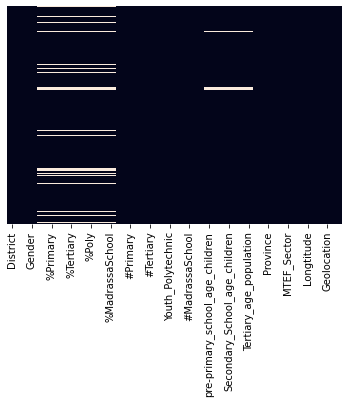

In [13]:
# checking for missing data - looks like quite a few nulls
sns.heatmap(school_data.isnull(),cbar=False,yticklabels=False)

52 rows have NaN data and by looking at them, they have no entries at all for the year. What is more, they are paired (male & female) so it shouldn't skew our data if we take them out and later decide to do some gender-based analysis.

In [14]:
school_data[school_data.isna().any(axis=1)]

District    Env  Gender %Pre-primary %Primary %Secondary  \
1       TURKANA SOUTH  Urban    Male          NaN      NaN        NaN   
30              RUIRU  Rural    Male          NaN      NaN        NaN   
31              RUIRU  Rural  Female          NaN      NaN        NaN   
47         EAST POKOT  Urban  Female          NaN      NaN        NaN   
57               LARI  Urban    Male          NaN      NaN        NaN   
58               LARI  Urban  Female          NaN      NaN        NaN   
71            MOMBASA  Rural    Male          NaN      NaN        NaN   
72            MOMBASA  Rural  Female          NaN      NaN        NaN   
73          KILINDINI  Rural    Male          NaN      NaN        NaN   
74          KILINDINI  Rural  Female          NaN      NaN        NaN   
169          KANGUNDO  Rural    Male          NaN      NaN        NaN   
170          KANGUNDO  Rural  Female          NaN      NaN        NaN   
181            CHALBI  Urban    Male          NaN      NaN        NaN   
182            CHALBI  Urban  Female          NaN      NaN        NaN   
191      MERU CENTRAL  Urban    Male          NaN      NaN        NaN   
192      MERU CENTRAL  Urban  Female          NaN      NaN        NaN   
235      NAIROBI WEST  Rural    Male          NaN      NaN        NaN   
236      NAIROBI WEST  Rural  Female          NaN      NaN        NaN   
237      NAIROBI EAST  Rural    Male          NaN      NaN        NaN   
238      NAIROBI EAST  Rural  Female          NaN      NaN        NaN   
239     NAIROBI NORTH  Rural    Male          NaN      NaN        NaN   
240     NAIROBI NORTH  Rural  Female          NaN      NaN        NaN   
241         WESTLANDS  Rural    Male          NaN      NaN        NaN   
242         WESTLANDS  Rural  Female          NaN      NaN        NaN   
283       WAJIR NORTH  Urban    Male          NaN      NaN        NaN   
284       WAJIR NORTH  Urban  Female          NaN      NaN        NaN   
361        KURIA EAST  Urban    Male          NaN      NaN        NaN   
362        KURIA EAST  Urban  Female          NaN      NaN        NaN   
375             MANGA  Urban    Male          NaN      NaN        NaN   
376             MANGA  Urban  Female          NaN      NaN        NaN   
471     TURKANA SOUTH  Urban  Female          NaN      NaN        NaN   
474       POKOT NORTH  Urban    Male          NaN      NaN        NaN   
475       POKOT NORTH  Urban  Female          NaN      NaN        NaN   
476     POKOT CENTRAL  Urban    Male          NaN      NaN        NaN   
477     POKOT CENTRAL  Urban  Female          NaN      NaN        NaN   
486  TRANS NZOIA EAST  Urban    Male          NaN      NaN        NaN   
487  TRANS NZOIA EAST  Urban  Female          NaN      NaN        NaN   
492     BARINGO NORTH  Urban    Male          NaN      NaN        NaN   
493     BARINGO NORTH  Urban  Female          NaN      NaN        NaN   
494        EAST POKOT  Urban    Male          NaN      NaN        NaN   
513       NANDI SOUTH  Urban    Male          NaN      NaN        NaN   
514       NANDI SOUTH  Urban  Female          NaN      NaN        NaN   
515          TINDERET  Urban    Male          NaN      NaN        NaN   
516          TINDERET  Urban  Female          NaN      NaN        NaN   
533       NAROK SOUTH  Urban    Male          NaN      NaN        NaN   
534       NAROK SOUTH  Urban  Female          NaN      NaN        NaN   
595    KAKAMEGA SOUTH  Urban    Male          NaN      NaN        NaN   
596    KAKAMEGA SOUTH  Urban  Female          NaN      NaN        NaN   
607            HAMISI  Urban    Male          NaN      NaN        NaN   
608            HAMISI  Urban  Female          NaN      NaN        NaN   
627             SAMIA  Urban    Male          NaN      NaN        NaN   
628             SAMIA  Urban  Female          NaN      NaN        NaN   

    %Tertiary %Uni %Poly %BLiteracy  ... Tertiary_age_population       County  \
1         NaN  NaN   NaN        NaN  ...                     0

In [15]:
# dropping all the lines with NaN
school_data.dropna(inplace=True) # 632 total rows - 52 nan containing rows = 580 rows, which is what we get

<AxesSubplot:>

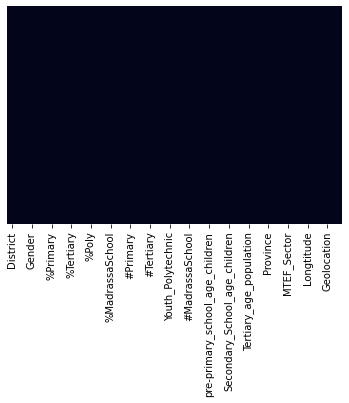

In [16]:
# yaay!! no more nulls
sns.heatmap(school_data.isnull(),cbar=False,yticklabels=False)

No null values anymore. However, we do see that the % columns have an object dtype. Let's make all numeric columns have type float

In [17]:
school_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 2 to 632
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   District                         580 non-null    object 
 1   Env                              580 non-null    object 
 2   Gender                           580 non-null    object 
 3   %Pre-primary                     580 non-null    object 
 4   %Primary                         580 non-null    object 
 5   %Secondary                       580 non-null    object 
 6   %Tertiary                        580 non-null    object 
 7   %Uni                             580 non-null    object 
 8   %Poly                            580 non-null    object 
 9   %BLiteracy                       580 non-null    object 
 10  %MadrassaSchool                  580 non-null    object 
 11  #Pre-primary                     580 non-null    int64  
 12  #Primary              

In [18]:
def convert_columns(df, dtype, columns):
    for col in columns:
        df[col].replace({'%':''}, regex=True, inplace=True)
        df[col] = df[col].astype(dtype)

In [19]:
school_data.columns.values

array(['District', 'Env', 'Gender', '%Pre-primary', '%Primary',
       '%Secondary', '%Tertiary', '%Uni', '%Poly', '%BLiteracy',
       '%MadrassaSchool', '#Pre-primary', '#Primary', '#Secondary',
       '#Tertiary', '#Uni', 'Youth_Polytechnic', '#BLiteracy',
       '#MadrassaSchool', 'Population', 'pre-primary_school_age_children',
       'Primary_school_age_children', 'Secondary_School_age_children',
       'School_age_children', 'Tertiary_age_population', 'County',
       'Province', 'Census_Table', 'MTEF_Sector', 'MTP_Sector',
       'Longtitude', 'Latitude', 'Geolocation', 'OBJECTID'], dtype=object)

In [20]:
columns_to_convert = ['%Pre-primary',
                       '%Primary', '%Secondary', '%Tertiary', '%Uni', '%Poly',
                       '%BLiteracy',
                       '%MadrassaSchool',
                       '#Pre-primary', '#Primary', '#Secondary', '#Tertiary', '#Uni',
                       'Youth_Polytechnic', '#BLiteracy', '#MadrassaSchool', 'Population',
                       'pre-primary_school_age_children', 'Primary_school_age_children',
                       'Secondary_School_age_children', 'School_age_children',
                       'Tertiary_age_population']
convert_columns(school_data, float, columns_to_convert)
school_data.info() # all the data we care about (and not categorical) is a float now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 2 to 632
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   District                         580 non-null    object 
 1   Env                              580 non-null    object 
 2   Gender                           580 non-null    object 
 3   %Pre-primary                     580 non-null    float64
 4   %Primary                         580 non-null    float64
 5   %Secondary                       580 non-null    float64
 6   %Tertiary                        580 non-null    float64
 7   %Uni                             580 non-null    float64
 8   %Poly                            580 non-null    float64
 9   %BLiteracy                       580 non-null    float64
 10  %MadrassaSchool                  580 non-null    float64
 11  #Pre-primary                     580 non-null    float64
 12  #Primary              

We still see some 0s in our describe

In [21]:
school_data.describe()

%Pre-primary    %Primary  %Secondary   %Tertiary        %Uni  \
count    580.000000  580.000000  580.000000  580.000000  580.000000   
mean      96.016810  112.018172   53.700707    6.999483    4.517483   
std       31.545436   22.400539   23.279409    8.577017    7.932493   
min        8.080000   16.040000    2.190000    0.000000    0.000000   
25%       82.947500  111.040000   39.167500    2.927500    1.177500   
50%      100.305000  118.435000   53.795000    5.045000    2.475000   
75%      117.042500  124.185000   67.970000    8.530000    4.732500   
max      157.960000  151.800000  127.930000  117.860000  101.390000   

            %Poly  %BLiteracy  %MadrassaSchool  #Pre-primary      #Primary  \
count  580.000000  580.000000       580.000000    580.000000    580.000000   
mean     0.839655    0.115000         0.767931   3874.260345  16250.672414   
std      0.826135    0.172917         2.689145   4081.095651  15209.373773   
min      0.000000    0.000000         0.000000     15.000000     70.000000   
25%      0.340000    0.030000         0.000000    898.750000   4077.000000   
50%      0.640000    0.070000         0.000000   2895.500000  12281.000000   
75%      1.012500    0.140000         0.040000   5488.500000  23558.000000   
max      5.350000    1.950000        19.260000  29848.000000  91204.000000   

       ...  #MadrassaSchool     Population  pre-primary_school_age_children  \
count  ...       580.000000     580.000000                       580.000000   
mean   ...       245.532759   24395.200000                      4133.806897   
std    ...      1311.168107   23836.893362                      3849.486985   
min    ...         0.000000     109.000000                        17.000000   
25%    ...         0.000000    6317.500000                      1192.250000   
50%    ...         1.000000   18835.000000                      3202.000000   
75%    ...         5.000000   35974.000000                      5943.750000   
max    ...     18808.000000  177400.000000                     26946.000000   

       Primary_school_age_children  Secondary_School_age_children  \
count                   580.000000                     580.000000   
mean                  14694.858621                    6044.167241   
std                   13304.117721                    5492.920410   
min                      62.000000                      21.000000   
25%                    4054.250000                    1719.750000   
50%                   11857.500000                    4771.500000   
75%                   22021.500000                    8937.000000   
max                   81767.000000                   36953.000000   

       School_age_children  Tertiary_age_population  Longtitude    Latitude  \
count           580.000000               580.000000  580.000000  580.000000   
mean          24872.832759              6850.029310   36.605418   -0.267433   
std           22564.424324              7960.082111    1.849093    1.522270   
min             108.000000                28.000000   34.020468   -4.397199   
25%            6895.250000              2180.500000   34.897430   -0.994048   
50%           19769.500000              5293.500000   36.556513   -0.218940   
75%           36950.250000              9275.500000   37.672531    0.473620   
max          145518.000000             86186.000000   41.292948    4.313788   

         OBJECTID  
count  580.000000  
mean   314.291379  
std    181.667510  
min      1.000000  
25%    154.750000  
50%    315.500000  
75%    464.250000  
max    631.000000  

[8 rows x 25 columns]

In [22]:
school_data.loc[school_data['%Tertiary'] == 0]

District    Env Gender  %Pre-primary  %Primary  %Secondary  %Tertiary  \
277     FAFI  Urban   Male         88.68    105.73       28.77        0.0   

     %Uni  %Poly  %BLiteracy  ...  Tertiary_age_population   County  \
277  2.86    0.0         0.0  ...                     70.0  Garissa   

          Province                                       Census_Table  \
277  NORTH EASTERN  Table 3b: Urban Population, 3 years and above ...   

                     MTEF_Sector              MTP_Sector  Longtitude  \
277  Human resources development  Education and Training   40.439081   

     Latitude                  Geolocation  OBJECTID  
277 -0.687064  (-0.687063677, 40.43908059)       276  

[1 rows x 34 columns]

In [23]:
school_data.loc[school_data['#Tertiary'] == 0]

District    Env Gender  %Pre-primary  %Primary  %Secondary  %Tertiary  \
277     FAFI  Urban   Male         88.68    105.73       28.77        0.0   

     %Uni  %Poly  %BLiteracy  ...  Tertiary_age_population   County  \
277  2.86    0.0         0.0  ...                     70.0  Garissa   

          Province                                       Census_Table  \
277  NORTH EASTERN  Table 3b: Urban Population, 3 years and above ...   

                     MTEF_Sector              MTP_Sector  Longtitude  \
277  Human resources development  Education and Training   40.439081   

     Latitude                  Geolocation  OBJECTID  
277 -0.687064  (-0.687063677, 40.43908059)       276  

[1 rows x 34 columns]

In [24]:
school_data.loc[school_data['%Uni'] == 0]

District    Env  Gender  %Pre-primary  %Primary  %Secondary  %Tertiary  \
116  TANA DELTA  Urban  Female        111.00    103.76       40.19       2.81   
278        FAFI  Urban  Female        103.33     76.62       21.43       2.22   

     %Uni  %Poly  %BLiteracy  ...  Tertiary_age_population      County  \
116   0.0    0.0         0.4  ...                    178.0  Tana River   
278   0.0    0.0         0.0  ...                     90.0     Garissa   

          Province                                       Census_Table  \
116          COAST  Table 3b: Urban Population, 3 years and above ...   
278  NORTH EASTERN  Table 3b: Urban Population, 3 years and above ...   

                     MTEF_Sector              MTP_Sector  Longtitude  \
116  Human resources development  Education and Training   39.516547   
278  Human resources development  Education and Training   40.439081   

     Latitude                  Geolocation  OBJECTID  
116 -2.317408  (-2.317407934, 39.51654731)       115  
278 -0.687064  (-0.687063677, 40.43908059)       277  

[2 rows x 34 columns]

In [25]:
school_data.loc[school_data['#Uni'] == 0]

District    Env  Gender  %Pre-primary  %Primary  %Secondary  %Tertiary  \
116  TANA DELTA  Urban  Female        111.00    103.76       40.19       2.81   
278        FAFI  Urban  Female        103.33     76.62       21.43       2.22   

     %Uni  %Poly  %BLiteracy  ...  Tertiary_age_population      County  \
116   0.0    0.0         0.4  ...                    178.0  Tana River   
278   0.0    0.0         0.0  ...                     90.0     Garissa   

          Province                                       Census_Table  \
116          COAST  Table 3b: Urban Population, 3 years and above ...   
278  NORTH EASTERN  Table 3b: Urban Population, 3 years and above ...   

                     MTEF_Sector              MTP_Sector  Longtitude  \
116  Human resources development  Education and Training   39.516547   
278  Human resources development  Education and Training   40.439081   

     Latitude                  Geolocation  OBJECTID  
116 -2.317408  (-2.317407934, 39.51654731)       115  
278 -0.687064  (-0.687063677, 40.43908059)       277  

[2 rows x 34 columns]

Considering that we see the FAFI and TANA DELTA Districts have a few 0s (in Tertiary, Uni & Poly), technically we could take them out, being careful to not skew the gender data, but considering that we will probably focus on primary/secondary education, the higher level education might not be impactful. So we'll keep it in and have more region data per the lower levels of education

In [26]:
# if wanted to remove the FAFI would run below
# school_data.drop(index=276, inplace=True) # FAFI Male
# school_data.drop(index=277, inplace=True) # FAFI Female

Finally let's encode our categorical data. Let's check first how many unique values we have per column

In [27]:
clean_data = school_data.copy() # saving a copy for later use
categories = school_data.select_dtypes(include=['O'])
categories.apply(pd.Series.nunique)

District        158
Env               2
Gender            2
County           47
Province          8
Census_Table      2
MTEF_Sector       1
MTP_Sector        1
Geolocation     158
dtype: int64

In [28]:
for col in school_data.columns:
    if school_data[col].dtype == 'object':
        lbl = preprocessing.LabelEncoder() # encoding
        lbl.fit(list(school_data[col].values)) # fitting the model
        school_data[col] = lbl.transform(list(school_data[col].values))

In [29]:
# Gender 1 == Male, 0 == Female
school_data.head()

District  Env  Gender  %Pre-primary  %Primary  %Secondary  %Tertiary  %Uni  \
2       113    0       1        114.34    118.51       64.27       5.99  2.18   
3       113    0       0        113.68    116.56       69.31       7.66  1.46   
4       114    0       1         96.18    120.32       52.60       3.55  2.17   
5       114    0       0         93.98    118.71       57.50       3.86  1.23   
6       116    0       1        109.00    122.83       75.37       5.49  4.56   

   %Poly  %BLiteracy  ...  Tertiary_age_population  County  Province  \
2   1.44        0.04  ...                   9533.0      34         0   
3   0.58        0.12  ...                   8738.0      34         0   
4   0.73        0.06  ...                  11582.0      34         0   
5   0.65        0.10  ...                  11177.0      34         0   
6   0.94        0.06  ...                  13064.0      35         0   

   Census_Table  MTEF_Sector  MTP_Sector  Longtitude  Latitude  Geolocation  \
2             1            0           0   36.423431 -0.144561            9   
3             1            0           0   36.423431 -0.144561            9   
4             1            0           0   36.556513 -0.533045           23   
5             1            0           0   36.556513 -0.533045           23   
6             1            0           0   36.981144 -0.266587           14   

   OBJECTID  
2         1  
3         2  
4         3  
5         4  
6         5  

[5 rows x 34 columns]

#### Data analysis

We'll start by looking at whether there are any gender-based education differences

In [30]:
school_data['Gender'].unique()

array([1, 0])

In [31]:
# separating the data set per gender
male_school_data = school_data.loc[school_data['Gender'] == 1]
male_school_data.head()

District  Env  Gender  %Pre-primary  %Primary  %Secondary  %Tertiary  \
2        113    0       1        114.34    118.51       64.27       5.99   
4        114    0       1         96.18    120.32       52.60       3.55   
6        116    0       1        109.00    122.83       75.37       5.49   
8        117    0       1        104.78    120.84       92.74       7.45   
10        52    0       1         83.38    124.62       70.90       4.34   

    %Uni  %Poly  %BLiteracy  ...  Tertiary_age_population  County  Province  \
2   2.18   1.44        0.04  ...                   9533.0      34         0   
4   2.17   0.73        0.06  ...                  11582.0      34         0   
6   4.56   0.94        0.06  ...                  13064.0      35         0   
8   3.72   1.78        0.08  ...                  11185.0      35         0   
10  2.71   0.76        0.11  ...                  19951.0      14         0   

    Census_Table  MTEF_Sector  MTP_Sector  Longtitude  Latitude  Geolocation  \
2              1            0           0   36.423431 -0.144561            9   
4              1            0           0   36.556513 -0.533045           23   
6              1            0           0   36.981144 -0.266587           14   
8              1            0           0   36.899279 -0.500808           21   
10             1            0           0   37.320184 -0.519267           22   

    OBJECTID  
2          1  
4          3  
6          5  
8          7  
10         9  

[5 rows x 34 columns]

In [32]:
female_school_data = school_data.loc[school_data['Gender'] == 0]
female_school_data.head()

District  Env  Gender  %Pre-primary  %Primary  %Secondary  %Tertiary  \
3        113    0       0        113.68    116.56       69.31       7.66   
5        114    0       0         93.98    118.71       57.50       3.86   
7        116    0       0        106.45    119.45       82.64       7.34   
9        117    0       0        102.69    118.16       88.74      11.68   
11        52    0       0         78.38    121.65       71.05       4.87   

    %Uni  %Poly  %BLiteracy  ...  Tertiary_age_population  County  Province  \
3   1.46   0.58        0.12  ...                   8738.0      34         0   
5   1.23   0.65        0.10  ...                  11177.0      34         0   
7   3.61   0.55        0.09  ...                  11656.0      35         0   
9   2.68   0.83        0.14  ...                   9703.0      35         0   
11  1.94   0.37        0.14  ...                  19207.0      14         0   

    Census_Table  MTEF_Sector  MTP_Sector  Longtitude  Latitude  Geolocation  \
3              1            0           0   36.423431 -0.144561            9   
5              1            0           0   36.556513 -0.533045           23   
7              1            0           0   36.981144 -0.266587           14   
9              1            0           0   36.899279 -0.500808           21   
11             1            0           0   37.320184 -0.519267           22   

    OBJECTID  
3          2  
5          4  
7          6  
9          8  
11        10  

[5 rows x 34 columns]

In [33]:
# create a new df with the mean values (summed and divided by the count of rows)
avg_female_school_data = female_school_data.apply(np.sum).div(female_school_data.shape[0])
avg_female_school_data.head()

District         77.527586
Env               0.482759
Gender            0.000000
%Pre-primary     94.805586
%Primary        109.949966
dtype: float64

In [34]:
avg_male_school_data = male_school_data.apply(np.sum).div(male_school_data.shape[0])
avg_male_school_data.head()

District         77.527586
Env               0.482759
Gender            1.000000
%Pre-primary     97.228034
%Primary        114.086379
dtype: float64

In [35]:
avg_female_school_data['%BLiteracy']

0.15089655172413796

In [36]:
avg_male_school_data['%BLiteracy']

0.07910344827586209

The literacy results above were surprising, so realized looking through the data again, that the number of counties with data showing as 0 for females (21) is less than for males (31), which explains the divergence
Will now recalculate the %BLiteracy by dividing the sum of the column by the number of rows - number of rows where data is 0

In [37]:
BLiteracy_zero_females = female_school_data[female_school_data['%BLiteracy'] == 0].shape[0]
BLiteracy_zero_females

21

In [38]:
BLiteracy_zero_males = male_school_data[male_school_data['%BLiteracy'] == 0].shape[0]
BLiteracy_zero_males

31

Recalculating the values, we still see them as smaller than expected. We think this data might not be reported correctly (might be per thousand of people or such) but without further information cannot use - this is a limitation

In [39]:
female_school_data.apply(np.sum).div(female_school_data.shape[0]-BLiteracy_zero_females)['%BLiteracy']

0.16267657992565057

In [40]:
# doing same for males
male_school_data.apply(np.sum).div(male_school_data.shape[0]-BLiteracy_zero_males)['%BLiteracy']

0.08857142857142859

#### Visualization

We see an important drop in the % of children in secondary school compared to primary school. The data lacks continuity so we check how numbers look like in 4 years when all primary school children should be in secondary school. However, the connection to the fact that secondary school would be paid out of pocket seems likely to be at play here. What is more, the fact that primary school percentages are > 100% clue us to the fact that children who cannot afford to continue their education repeat a few primary school classes.

We used a bar plot below to easily visualize the percentage of children enrolled in the Kenyan school system per categories (i.e., gender and levels of education) and to quickly identify the educational trends between males and females.

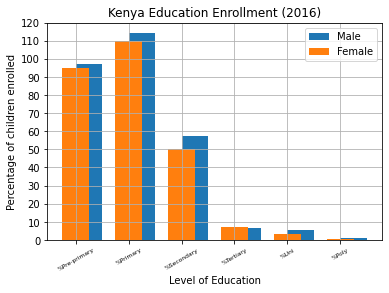

In [41]:
plt.bar([1.25, 2.25, 3.25, 4.25, 5.25, 6.25],avg_male_school_data[['%Pre-primary','%Primary','%Secondary','%Tertiary','%Uni','%Poly']], label='Male', width=0.5)
plt.bar([1, 2, 3, 4, 5, 6],avg_female_school_data[['%Pre-primary','%Primary','%Secondary','%Tertiary','%Uni','%Poly']], label='Female', width=0.5)
plt.legend()
plt.xlabel('Level of Education')
plt.ylabel('Percentage of children enrolled')
plt.title('Kenya Education Enrollment (2016)')
plt.xticks(np.arange(1,7,1),['%Pre-primary','%Primary','%Secondary','%Tertiary','%Uni','%Poly'], rotation=30, fontsize=6)
plt.yticks(np.arange(0,125,10))
plt.grid()
plt.savefig('new_data/education_enrollment.png', dpi=200)
plt.show()

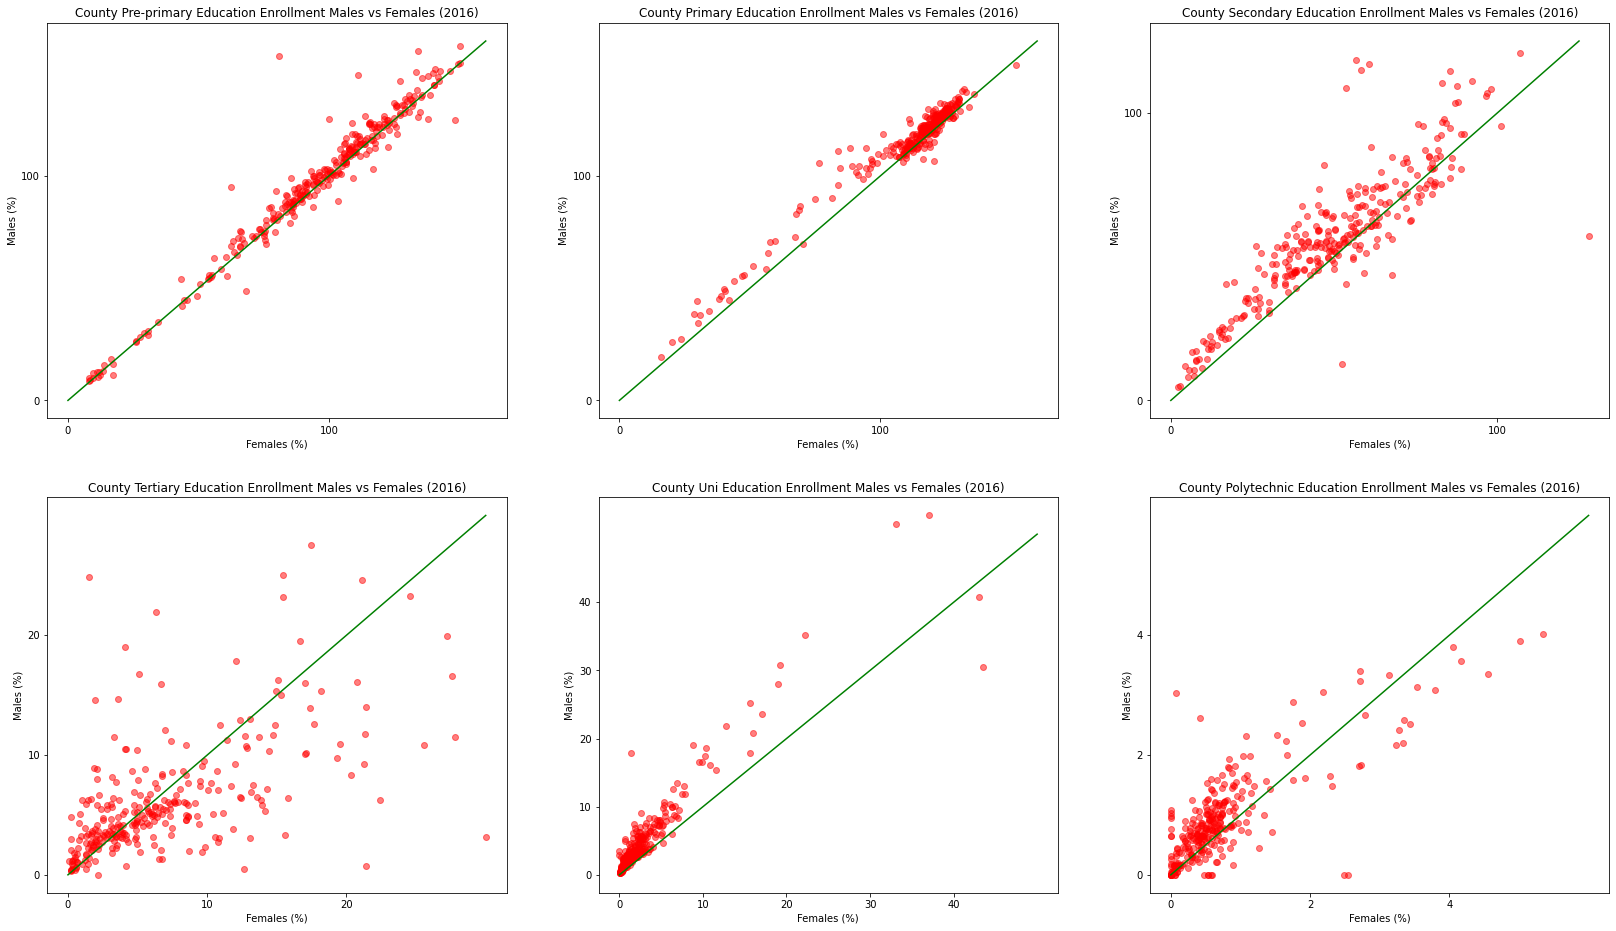

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(28,16))
female_education = [female_school_data['%Pre-primary'], female_school_data['%Primary'],
                    female_school_data['%Secondary'], female_school_data[female_school_data['%Tertiary'] < 30]['%Tertiary'],
                    female_school_data[female_school_data['%Uni'] < 60]['%Uni'], female_school_data['%Poly']]
male_education = [male_school_data['%Pre-primary'], male_school_data['%Primary'],
                  male_school_data['%Secondary'], male_school_data[male_school_data['%Tertiary'] < 30]['%Tertiary'],
                  male_school_data[male_school_data['%Uni'] < 60]['%Uni'], male_school_data['%Poly']]
titles = ['County Pre-primary Education Enrollment Males vs Females (2016)',
          'County Primary Education Enrollment Males vs Females (2016)',
          'County Secondary Education Enrollment Males vs Females (2016)',
          'County Tertiary Education Enrollment Males vs Females (2016)',
          'County Uni Education Enrollment Males vs Females (2016)',
          'County Polytechnic Education Enrollment Males vs Females (2016)']
np_values = [(160,100), (160,100), (125,100), (30,10), (50,10), (6,2)]
for i, ax in enumerate(axes.flat):
    f = ax.scatter(female_education[i], male_education[i], c='r', alpha=0.5)
    x = np.linspace(0,np_values[i][0],np_values[i][1])
    y = x
    ax.plot(x, y, 'g', label='y=x')
    ax.set_xlabel('Females (%)')
    ax.set_ylabel('Males (%)')
    ax.set_title(titles[i])
    ax.xaxis.set_ticks(range(0, np_values[i][0],np_values[i][1]))
    ax.yaxis.set_ticks(range(0, np_values[i][0],np_values[i][1]))

In [43]:
fig.savefig('new_data/education_gender_scatterplots.png', dpi=300)

Each data point on the scatterplots represents a county and we are plotting male vs female enrollment percentages per education level. The conclusion is that the gender differences are slightly skewed towards males in most counties, with tertiary education being the only exception, which seems slightly skewed towards females. Looking at the university level though, the differences are more pronounced, with more males than females, but even so the numbers are fairly small, in most counties under 10% of university aged individuals get to go to university. We are inclined to conclude that Operation Orphan shouldn't have a different approach per gender in Kenya without more granular research into the matter.

We used subplots of scattergraphs to be able to show the gender distribution differences between education enrollment levels per county. We zoomed into the data for the Tertiary and University levels since the points were very localized around the origin and the male to female distribution was hard to observe otherwise.

#### Spacial distribution in GeoPandas

In [44]:
clean_data['%Secondary'].describe()

count    580.000000
mean      53.700707
std       23.279409
min        2.190000
25%       39.167500
50%       53.795000
75%       67.970000
max      127.930000
Name: %Secondary, dtype: float64

We are interested in the data per county now. Since we are aggregating data per county from Female-Urban, Female-Rural, Male-Urban & Male-Rural, if we take the mean it implies that the 4 types of data have equal weight, which might not be accurate. Instead we can calculate the percentages from the data we are given. More specifically:
- Step 1) - %Secondary * #Secondary will give us the children in Secondary school for the specific demographic of the county
- Step 2) - Sum(%Secondary * #Secondary) will give us the children in Secondary school for the entire county
- Step 3) - Sum(#Secondary) will give us the secondary school aged population for the county
- Step 4) - Sum(%Secondary * #Secondary)/Sum(#Secondary) will give us the new percentage per county

In [45]:
# Steps 1 & 2
clean_data.insert(len(clean_data.columns), "Children in Secondary School", clean_data['%Secondary'] * clean_data['#Secondary']/100)
county_ed_data = clean_data.groupby('County').sum()
county_ed_data.head()

%Pre-primary  %Primary  %Secondary  %Tertiary   %Uni  %Poly  \
County                                                                         
Baringo               1307.53   1343.81      626.85     157.71  45.74   7.62   
Bomet                 1074.24   1545.68      642.77      90.85  36.27   8.50   
Bungoma               1748.14   2539.15     1004.93      99.72  56.57  11.77   
Busia                 1830.79   2193.27      832.91      73.59  42.63  15.74   
Elgeyo Marakwet        814.49   1028.01      430.70      74.15  30.11   7.94   

                 %BLiteracy  %MadrassaSchool  #Pre-primary  #Primary  ...  \
County                                                                ...   
Baringo                0.70             0.08       38127.0  147335.0  ...   
Bomet                  1.05             0.03       53441.0  275196.0  ...   
Bungoma                0.77             0.08       84738.0  425597.0  ...   
Busia                  1.82             0.60       50100.0  221071.0  ...   
Elgeyo Marakwet        0.39             0.01       25729.0  115772.0  ...   

                 Population  pre-primary_school_age_children  \
County                                                         
Baringo            217623.0                          38442.0   
Bomet              379816.0                          60441.0   
Bungoma            584772.0                          97822.0   
Busia              305659.0                          51647.0   
Elgeyo Marakwet    162419.0                          24612.0   

                 Primary_school_age_children  Secondary_School_age_children  \
County                                                                        
Baringo                             142563.0                        58508.0   
Bomet                               211207.0                        86152.0   
Bungoma                             332805.0                       133410.0   
Busia                               178998.0                        74251.0   
Elgeyo Marakwet                      88493.0                        36715.0   

                 School_age_children  Tertiary_age_population  Longtitude  \
County                                                                      
Baringo                     239513.0                  53863.0  431.023068   
Bomet                       357800.0                  94760.0  423.085619   
Bungoma                     564037.0                 137590.0  693.044136   
Busia                       304896.0                  74416.0  615.573363   
Elgeyo Marakwet             149820.0                  35869.0  284.309579   

                  Latitude  OBJECTID  Children in Secondary School  
County                                                              
Baringo           5.805788      5212                    13551.3290  
Bomet            -8.590993      6042                    21954.8779  
Bungoma          14.528453     11930                    31660.5571  
Busia             7.416770     10877                    12950.5246  
Elgeyo Marakwet   6.292402      3684                     8241.8840  

[5 rows x 26 columns]

In [46]:
# Steps 3 & 4
county_ed_data['%Secondary'] = county_ed_data['Children in Secondary School']/county_ed_data['#Secondary'] * 100

We are using the Kenya shapefiles found at [AfricaOpenData](https://africaopendata.org/dataset/kenya-administrative-boundaries) and following the steps at [TowardsDataScience](https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d)

In [47]:
# setting the filepath and loading in a shapefile
fp = 'kenya_shapefiles/ken_admbnda_adm1_iebc_20180607.shp'
map_df = gpd.read_file(fp)
# the map_df is a geodf
map_df.head()

Shape_Leng  Shape_Area          ADM1_EN ADM1_PCODE ADM1_REF ADM1ALT1EN  \
0    5.932315    0.884732          Baringo      KE030     None       None   
1    2.922220    0.198099            Bomet      KE036     None       None   
2    3.062486    0.245058          Bungoma      KE039     None       None   
3    2.670396    0.147178            Busia      KE040     None       None   
4    3.888933    0.244432  Elgeyo-Marakwet      KE028     None       None   

  ADM1ALT2EN ADM0_EN ADM0_PCODE        date     validOn validTo  \
0       None   Kenya         KE  2017-11-03  2018-06-07    None   
1       None   Kenya         KE  2017-11-03  2018-06-07    None   
2       None   Kenya         KE  2017-11-03  2018-06-07    None   
3       None   Kenya         KE  2017-11-03  2018-06-07    None   
4       None   Kenya         KE  2017-11-03  2018-06-07    None   

                                            geometry  
0  POLYGON ((35.78390 1.65557, 35.78496 1.65554, ...  
1  POLYGON ((35.47360 -0.39920, 35.47845 -0.40663...  
2  POLYGON ((34.62017 1.10228, 34.62133 1.10160, ...  
3  POLYGON ((34.36097 0.77730, 34.36172 0.77696, ...  
4  POLYGON ((35.69818 1.28225, 35.69788 1.27905, ...

<AxesSubplot:>

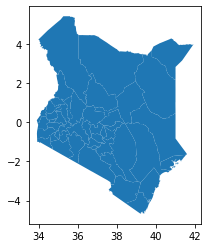

In [48]:
map_df.plot()

Now we'll join the geodf data with the county data using the County as the common column

In [49]:
merged = map_df.set_index('ADM1_EN').join(county_ed_data)
merged.head()

Shape_Leng  Shape_Area ADM1_PCODE ADM1_REF ADM1ALT1EN  \
ADM1_EN                                                                  
Baringo            5.932315    0.884732      KE030     None       None   
Bomet              2.922220    0.198099      KE036     None       None   
Bungoma            3.062486    0.245058      KE039     None       None   
Busia              2.670396    0.147178      KE040     None       None   
Elgeyo-Marakwet    3.888933    0.244432      KE028     None       None   

                ADM1ALT2EN ADM0_EN ADM0_PCODE        date     validOn  ...  \
ADM1_EN                                                                ...   
Baringo               None   Kenya         KE  2017-11-03  2018-06-07  ...   
Bomet                 None   Kenya         KE  2017-11-03  2018-06-07  ...   
Bungoma               None   Kenya         KE  2017-11-03  2018-06-07  ...   
Busia                 None   Kenya         KE  2017-11-03  2018-06-07  ...   
Elgeyo-Marakwet       None   Kenya         KE  2017-11-03  2018-06-07  ...   

                Population pre-primary_school_age_children  \
ADM1_EN                                                      
Baringo           217623.0                         38442.0   
Bomet             379816.0                         60441.0   
Bungoma           584772.0                         97822.0   
Busia             305659.0                         51647.0   
Elgeyo-Marakwet        NaN                             NaN   

                 Primary_school_age_children  Secondary_School_age_children  \
ADM1_EN                                                                       
Baringo                             142563.0                        58508.0   
Bomet                               211207.0                        86152.0   
Bungoma                             332805.0                       133410.0   
Busia                               178998.0                        74251.0   
Elgeyo-Marakwet                          NaN                            NaN   

                 School_age_children  Tertiary_age_population  Longtitude  \
ADM1_EN                                                                     
Baringo                     239513.0                  53863.0  431.023068   
Bomet                       357800.0                  94760.0  423.085619   
Bungoma                     564037.0                 137590.0  693.044136   
Busia                       304896.0                  74416.0  615.573363   
Elgeyo-Marakwet                  NaN                      NaN         NaN   

                  Latitude  OBJECTID  Children in Secondary School  
ADM1_EN                                                             
Baringo           5.805788    5212.0                    13551.3290  
Bomet            -8.590993    6042.0                    21954.8779  
Bungoma          14.528453   11930.0                    31660.5571  
Busia             7.416770   10877.0                    12950.5246  
Elgeyo-Marakwet        NaN       NaN                           NaN  

[5 rows x 38 columns]

Text(0.1, 0.08, 'Source: OpenAfrica, 2016')

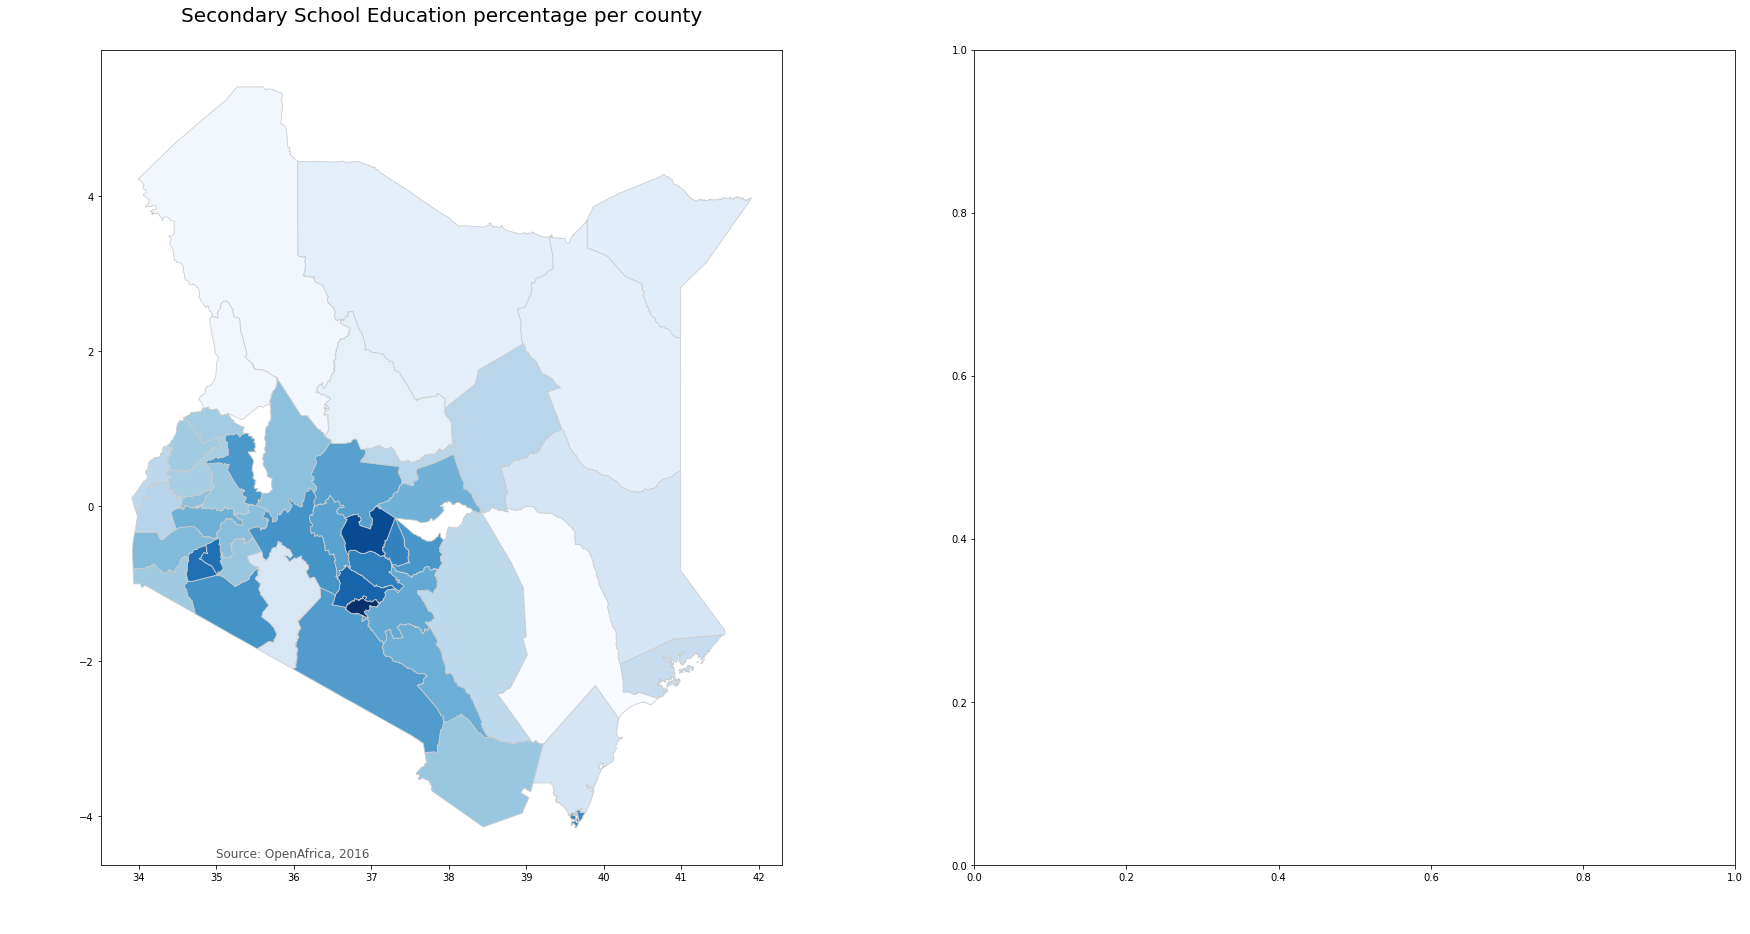

In [50]:
variable = '%Secondary'
# setting the range for the choropleth
vmin, vmax = 0, 130
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))
# creating the map
merged.plot(column=variable, cmap='Blues', ax=ax1, linewidth=0.8, edgecolor='0.8')
ax1.set_title('Secondary School Education percentage per county\n', fontdict={'fontsize': '20', 'fontweight' : '3'})
ax1.annotate('Source: OpenAfrica, 2016',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

Adding a colorbar instead of a normal legend so we can read the colors

In [51]:
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax=cax, orientation="horizontal")
cbar.set_label(label = 'Attendance (%)', size='large')
cbar.ax.tick_params(labelsize=15) 

In [52]:
variable = 'Population'
clean_data['Population'].describe()

count       580.000000
mean      24395.200000
std       23836.893362
min         109.000000
25%        6317.500000
50%       18835.000000
75%       35974.000000
max      177400.000000
Name: Population, dtype: float64

In [53]:
vmin, vmax = 105, 177500
merged.plot(column=variable, cmap='Oranges', ax=ax2, linewidth=0.8, edgecolor='0.8')
ax2.set_title('Population per county\n', fontdict={'fontsize': '20', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
divider = make_axes_locatable(ax2)
cax = divider.append_axes("bottom", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax=cax, orientation="horizontal")
cbar.set_label(label = 'Population', size='large')
cbar.ax.tick_params(labelsize=15)
fig.savefig('new_data/education_map.png', dpi=300)

<Figure size 432x288 with 0 Axes>

Because sometimes it takes a bit for the picture to render, here is the end result ![here](graphs/education_map.png)

As we see from the choropleths, the counties in west, south-east and north-east have a large population (between 60,000 and 120,000) and levels of secondary education of only 20-40%. These should be the first areas of focus for Operation Orphan.

We used a choropleth to visualize the data geographically and to see school attendance in parallel to population sizes per county.

# Health

## Malaria

#### Data and Analysis
In the following section we'll analyze health data from Kenya Open Data, which is managed by ICT Authority (Information and Communication Technology) and has datasets for specific regions and counties in Kenya. The data was captured in 2016 with Health Spending per Capita details per county, as well as percentage of people that had fever or malaria and slept under a bed net.

One of the Rubbish Science projects teaches ways to capture mosquitoes in an effort to reduce malaria cases and explore simple solutions to reduce infections. Therefore, there is interest to understand malaria data better for specific counties in Kenya that could lead to a different expansion approach for the Rubbish Science project.

### Data Understanding

Initial data was collected from Kenya Open Data.
The dictionary was analysed and the key 'features' was extracted with a relevant dataset.

In [54]:
json = get_api_data('https://opendata.arcgis.com/datasets/1f4cfc98b479494182d80ba1a991fce9_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')
json

INFO:root:Your API response was 200. I got the info :)


{'objectIdFieldName': 'OBJECTID',
 'uniqueIdField': {'name': 'OBJECTID', 'isSystemMaintained': True},
 'globalIdFieldName': '',
 'hasZ': False,
 'hasM': False,
 'spatialReference': {'wkid': 4326},
 'fields': [{'name': 'OBJECTID',
   'type': 'esriFieldTypeOID',
   'alias': 'OBJECTID',
   'sqlType': 'sqlTypeInteger',
   'domain': None,
   'defaultValue': None},
  {'name': 'County',
   'type': 'esriFieldTypeString',
   'alias': 'County',
   'sqlType': 'sqlTypeOther',
   'domain': None,
   'defaultValue': None,
   'length': 128},
  {'name': '%_That_Slept_Under_a_Bed_Net',
   'type': 'esriFieldTypeString',
   'alias': '%_That_Slept_Under_a_Bed_Net',
   'sqlType': 'sqlTypeOther',
   'domain': None,
   'defaultValue': None,
   'length': 128},
  {'name': '%_That_Had_a_Fever_or_Malaria',
   'type': 'esriFieldTypeString',
   'alias': '%_That_Had_a_Fever_or_Malaria',
   'sqlType': 'sqlTypeOther',
   'domain': None,
   'defaultValue': None,
   'length': 128},
  {'name': 'Heath_Spending_Per_Person_

In [55]:
features_list = json['features']
features_list

[{'attributes': {'County': 'Baringo',
   '%_That_Slept_Under_a_Bed_Net': '24.20%',
   '%_That_Had_a_Fever_or_Malaria': '14.90%',
   'Heath_Spending_Per_Person_': 29,
   'Geolocation': None,
   'OBJECTID': 0}},
 {'attributes': {'County': 'Bomet',
   '%_That_Slept_Under_a_Bed_Net': '26.30%',
   '%_That_Had_a_Fever_or_Malaria': '39.50%',
   'Heath_Spending_Per_Person_': 20,
   'Geolocation': None,
   'OBJECTID': 1}},
 {'attributes': {'County': 'Bungoma',
   '%_That_Slept_Under_a_Bed_Net': '27.80%',
   '%_That_Had_a_Fever_or_Malaria': '37.60%',
   'Heath_Spending_Per_Person_': 20,
   'Geolocation': None,
   'OBJECTID': 2}},
 {'attributes': {'County': 'Busia',
   '%_That_Slept_Under_a_Bed_Net': '40.70%',
   '%_That_Had_a_Fever_or_Malaria': '42.80%',
   'Heath_Spending_Per_Person_': 20,
   'Geolocation': None,
   'OBJECTID': 3}},
 {'attributes': {'County': 'Elgeyo/Marakwet',
   '%_That_Slept_Under_a_Bed_Net': '7.50%',
   '%_That_Had_a_Fever_or_Malaria': '9.40%',
   'Heath_Spending_Per_Person

In [56]:
attributes = pd.json_normalize(features_list)

df_health = pd.DataFrame(attributes)
df_health.head()

attributes.County attributes.%_That_Slept_Under_a_Bed_Net  \
0           Baringo                                  24.20%   
1             Bomet                                  26.30%   
2           Bungoma                                  27.80%   
3             Busia                                  40.70%   
4   Elgeyo/Marakwet                                   7.50%   

  attributes.%_That_Had_a_Fever_or_Malaria  \
0                                   14.90%   
1                                   39.50%   
2                                   37.60%   
3                                   42.80%   
4                                    9.40%   

   attributes.Heath_Spending_Per_Person_ attributes.Geolocation  \
0                                     29                   None   
1                                     20                   None   
2                                     20                   None   
3                                     20                   None   
4                                     48                   None   

   attributes.OBJECTID  
0                    0  
1                    1  
2                    2  
3                    3  
4                    4

In [57]:
# saving the data to csv
df_health.to_csv('new_data/health_per_county.csv') 

In [58]:
# loading the data from the csv
saved_health_df = pd.read_csv('data/health_per_county.csv', header=0, parse_dates=True)
saved_health_df.head()

Unnamed: 0 attributes.County attributes.%_That_Slept_Under_a_Bed_Net  \
0           0           Baringo                                  24.20%   
1           1             Bomet                                  26.30%   
2           2           Bungoma                                  27.80%   
3           3             Busia                                  40.70%   
4           4   Elgeyo/Marakwet                                   7.50%   

  attributes.%_That_Had_a_Fever_or_Malaria  \
0                                   14.90%   
1                                   39.50%   
2                                   37.60%   
3                                   42.80%   
4                                    9.40%   

   attributes.Heath_Spending_Per_Person_  attributes.Geolocation  \
0                                     29                     NaN   
1                                     20                     NaN   
2                                     20                     NaN   
3                                     20                     NaN   
4                                     48                     NaN   

   attributes.OBJECTID  
0                    0  
1                    1  
2                    2  
3                    3  
4                    4

### Data Preparation

#### Format
To manipulate easily and understand better, the field names were modified without the key 'attributes'. 

#### Cleanse
The percentual data was an object. In order to avoid errors in the analysis, the data was converted to numbers and the data type modified to float. 


In [59]:
df_health.rename(columns = {'attributes.County': 'County', 'attributes.%_That_Slept_Under_a_Bed_Net': '% People Sleeping Under A Bed Net','attributes.%_That_Had_a_Fever_or_Malaria': '% People That Had a Fever or Malaria','attributes.Heath_Spending_Per_Person_': 'Health Spending Per Person','attributes.Geolocation': 'Geolocation','attributes.OBJECTID': 'ObjectID',}, inplace = True)
df_health.head()

County % People Sleeping Under A Bed Net  \
0          Baringo                            24.20%   
1            Bomet                            26.30%   
2          Bungoma                            27.80%   
3            Busia                            40.70%   
4  Elgeyo/Marakwet                             7.50%   

  % People That Had a Fever or Malaria  Health Spending Per Person  \
0                               14.90%                          29   
1                               39.50%                          20   
2                               37.60%                          20   
3                               42.80%                          20   
4                                9.40%                          48   

  Geolocation  ObjectID  
0        None         0  
1        None         1  
2        None         2  
3        None         3  
4        None         4

In [60]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   County                                47 non-null     object
 1   % People Sleeping Under A Bed Net     47 non-null     object
 2   % People That Had a Fever or Malaria  47 non-null     object
 3   Health Spending Per Person            47 non-null     int64 
 4   Geolocation                           0 non-null      object
 5   ObjectID                              47 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.3+ KB


In [61]:
#Converting the string of percentage into numerical values
df_health['% People Sleeping Under A Bed Net'] = df_health['% People Sleeping Under A Bed Net'].apply(lambda x: x.replace('%', ''))
df_health['% People That Had a Fever or Malaria'] = df_health['% People That Had a Fever or Malaria'].apply(lambda x: x.replace('%', ''))
df_health.head()

County % People Sleeping Under A Bed Net  \
0          Baringo                             24.20   
1            Bomet                             26.30   
2          Bungoma                             27.80   
3            Busia                             40.70   
4  Elgeyo/Marakwet                              7.50   

  % People That Had a Fever or Malaria  Health Spending Per Person  \
0                                14.90                          29   
1                                39.50                          20   
2                                37.60                          20   
3                                42.80                          20   
4                                 9.40                          48   

  Geolocation  ObjectID  
0        None         0  
1        None         1  
2        None         2  
3        None         3  
4        None         4

In [62]:
#Convert the data type from object to float of percentage values modified to numerical
df_health['% People Sleeping Under A Bed Net'] = pd.to_numeric(df_health['% People Sleeping Under A Bed Net'], errors='coerce')
df_health['% People That Had a Fever or Malaria'] = pd.to_numeric(df_health['% People That Had a Fever or Malaria'], errors='coerce')

df_health.dtypes

County                                   object
% People Sleeping Under A Bed Net       float64
% People That Had a Fever or Malaria    float64
Health Spending Per Person                int64
Geolocation                              object
ObjectID                                  int64
dtype: object

### Visualization & Analysis

The most common statistical calculations were done using the describe function returning results to each variable. 

To understand better the relation between each variable and the metrics, different graphs were pulled accordingly with the counties in Kenya.

Through analysing some of the values below it is possible to conclude that some of the counties haven't reported correctly the percentage of people that have fever or malaria as the min is zero and this would possibly be incorrect considering real life situations. Although, we do have values for all counties considering the count calculation. We can also see a possible outlier county for % People sleeping under a bed net as the 75% is on 38.45 and the max is 62.40, a considerable increase in the quartile. 

In [63]:
df_health.describe()

% People Sleeping Under A Bed Net  \
count                          47.000000   
mean                           26.729787   
std                            14.801174   
min                             1.700000   
25%                            12.950000   
50%                            27.800000   
75%                            38.450000   
max                            62.400000   

       % People That Had a Fever or Malaria  Health Spending Per Person  \
count                             47.000000                   47.000000   
mean                              40.180851                   24.042553   
std                               15.168154                   11.500392   
min                                0.000000                    7.000000   
25%                               35.000000                   16.500000   
50%                               42.600000                   22.000000   
75%                               50.700000                   29.000000   
max                               63.300000                   50.000000   

        ObjectID  
count  47.000000  
mean   23.000000  
std    13.711309  
min     0.000000  
25%    11.500000  
50%    23.000000  
75%    34.500000  
max    46.000000

In [64]:
median_bed_net = pd.DataFrame.median(df_health['% People Sleeping Under A Bed Net'])
median_fever_malaria = pd.DataFrame.median(df_health['% People That Had a Fever or Malaria'])
median_health = pd.DataFrame.median(df_health['Health Spending Per Person'])

df_health.quantile([.5])

% People Sleeping Under A Bed Net  % People That Had a Fever or Malaria  \
0.5                               27.8                                  42.6   

     Health Spending Per Person  ObjectID  
0.5                        22.0      23.0

In [65]:
mean_bed_net = pd.DataFrame.mean(df_health['% People Sleeping Under A Bed Net'])
mean_fever_malaria = pd.DataFrame.mean(df_health['% People That Had a Fever or Malaria'])
mean_health = pd.DataFrame.mean(df_health['Health Spending Per Person'])

df_health.mean(numeric_only=True)

% People Sleeping Under A Bed Net       26.729787
% People That Had a Fever or Malaria    40.180851
Health Spending Per Person              24.042553
ObjectID                                23.000000
dtype: float64

### Counties visualization 

For our analysis is important to understand what is a good behaviour for each variable in this project:

   - % People Sleeping Under A Bed Net     : The higher is the percentage the better is the county result
   - % People That Had a Fever or Malaria  : The lower is the percentage the better is the county result
   - Health Spending Per Person            : The lower is the percentage the better is the county result
    
Understanding the mean for Kenya of each variable allows future analysis on the behaviour of counties with a lower percentage of people that sleeps under a bed net, and the counties with a higher percentage of people that had a Fever or malaria compared to Kenya mean for this variable.
    
The first graph below presents the Counties with good data to benchmark. Meaning they had a higher percentage of people sleeping under a bed net than the mean of Kenya and a lower percentage of people with fever or malaria than the mean. 

On the other hand, the second graph shows the Counties that can improve their data and social behaviours to avoid fever or malaria. Meaning they had a lower percentage of people sleeping under a bed net than the mean of Kenya and a higher percentage of people with fever or malaria than the mean.

We used barplots again since we are plotting categories of health data.

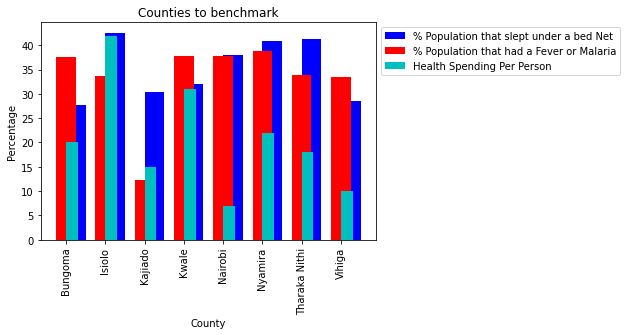

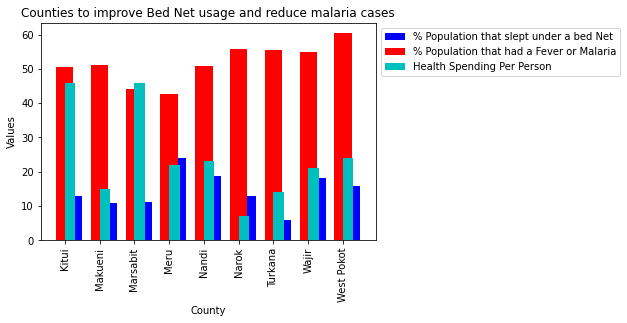

In [66]:
ndata = df_health[ (df_health['% People Sleeping Under A Bed Net'] > mean_bed_net)& (df_health['% People That Had a Fever or Malaria'] < mean_fever_malaria)] 
kdata = df_health[ (df_health['% People Sleeping Under A Bed Net'] < mean_bed_net)& (df_health['% People That Had a Fever or Malaria'] > mean_fever_malaria)] 

#GRAPH 01
n_under_bed_net = ndata['% People Sleeping Under A Bed Net']
n_fever_or_malaria = ndata['% People That Had a Fever or Malaria']
n_health_spending = ndata['Health Spending Per Person']
n_kenya_county = ndata['County'].tolist()

plt.bar(n_kenya_county, n_under_bed_net,   label = '% Population that slept under a bed Net',  color = 'b', width=0.5, align='edge')
plt.bar(n_kenya_county, n_fever_or_malaria,   label = '% Population that had a Fever or Malaria',  color = 'r', width=0.5, align='center')
plt.bar(n_kenya_county, n_health_spending,   label = 'Health Spending Per Person', color = 'c', align='edge', width=0.3)


plt.xlabel('County')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.xticks(n_kenya_county,rotation=90)

plt.title('Counties to benchmark')
plt.savefig('new_data/counties_to_benchmark.png', dpi=300)
plt.show()

#GRAPH 02
under_bed_net = kdata['% People Sleeping Under A Bed Net']
fever_or_malaria = kdata['% People That Had a Fever or Malaria']
health_spending = kdata['Health Spending Per Person']
kenya_county = kdata['County'].tolist()

plt.bar(kenya_county, under_bed_net,   label = '% Population that slept under a bed Net', color = 'b', width=0.5, align='edge')
plt.bar(kenya_county, fever_or_malaria,   label = '% Population that had a Fever or Malaria',   color = 'r', width=0.5, align='center')
plt.bar(kenya_county, health_spending,   label = 'Health Spending Per Person',  color = 'c', align='edge', width=0.3)

plt.xlabel('County')
plt.ylabel('Values')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.xticks(kenya_county,rotation=90)
plt.title('Counties to improve Bed Net usage and reduce malaria cases')
plt.savefig('new_data/counties_to_improve.png', dpi=300)
plt.show()

### Assumptions

It would be expected that the higher the use of bed nets, the lower fever or malaria cases a county would have.
 
However, many aspects influence fever and malaria cases more than solely the use of bed nets. A limitation of this project and suggestion for future analysis is to find other variables to compare per county in Kenya in the same year and have a better conclusion. 

Below two plots were shown with an expected and unexpected behaviour calculated by 4 conditions.

For the scenario below:
    
    1. If the percentage of people that sleeps under a bed net on that county is higher than the median of Kenya
    2. The percentage of people sleeping under a bed net should be higher than the percentage of people that had fever or malaria
    
  Consequently the behaviours should be:
        
  Expected: The percentage of people that had fever or malaria should be lower than the median for Kenya
  
  Unexpected: The percentage of people that had fever or malaria should be higher than the median for Kenya
  
We used barplots to visualize categorical data per county.

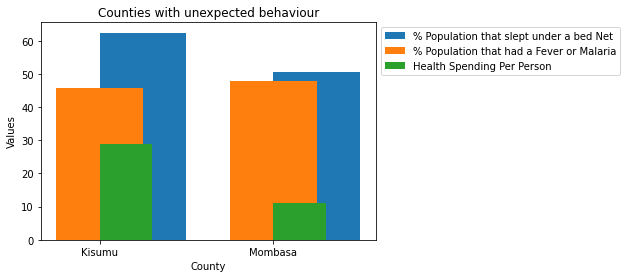

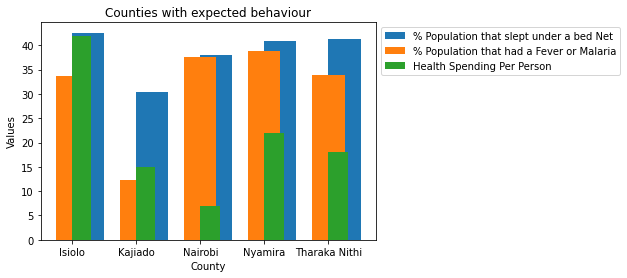

In [67]:
expected_data = df_health[ (df_health['% People Sleeping Under A Bed Net'] > median_bed_net) & (df_health['% People That Had a Fever or Malaria']<median_fever_malaria)  & (df_health['% People Sleeping Under A Bed Net'] > df_health['% People That Had a Fever or Malaria'])]
unexpected_data = df_health[ (df_health['% People Sleeping Under A Bed Net'] > median_bed_net) & (df_health['% People That Had a Fever or Malaria']>median_fever_malaria) & (df_health['% People Sleeping Under A Bed Net'] > df_health['% People That Had a Fever or Malaria'])]

#GRAPH Counties with unexpected behaviour
unex_under_bed_net = unexpected_data['% People Sleeping Under A Bed Net']
unex_fever_or_malaria = unexpected_data['% People That Had a Fever or Malaria']
unex_health_spending = unexpected_data['Health Spending Per Person']
unex_kenya_county = unexpected_data['County'].tolist()
plt.bar(unex_kenya_county, unex_under_bed_net,   label = '% Population that slept under a bed Net',  width=0.5, align='edge')
plt.bar(unex_kenya_county, unex_fever_or_malaria,   label = '% Population that had a Fever or Malaria', width=0.5, align='center')
plt.bar(unex_kenya_county, unex_health_spending,   label = 'Health Spending Per Person',  align='edge', width=0.3)
plt.xlabel('County')
plt.ylabel('Values')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.xticks(unex_kenya_county,rotation=0)
plt.title('Counties with unexpected behaviour')
plt.savefig('new_data/counties_malaria_unexpected.png', dpi=300)
plt.show()

#GRAPH Counties with expected behaviour
ex_under_bed_net = expected_data['% People Sleeping Under A Bed Net']
ex_fever_or_malaria = expected_data['% People That Had a Fever or Malaria']
ex_health_spending = expected_data['Health Spending Per Person']
ex_kenya_county = expected_data['County'].tolist()
plt.bar(ex_kenya_county, ex_under_bed_net,   label = '% Population that slept under a bed Net', width=0.5, align='edge')
plt.bar(ex_kenya_county, ex_fever_or_malaria,   label = '% Population that had a Fever or Malaria',  width=0.5, align='center')
plt.bar(ex_kenya_county, ex_health_spending,   label = 'Health Spending Per Person',  align='edge', width=0.3)
plt.xlabel('County')
plt.ylabel('Values')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.xticks(ex_kenya_county,rotation=0)
plt.title('Counties with expected behaviour')
plt.savefig('new_data/counties_malaria_expected.png', dpi=300)
plt.show()

### Variable Correlation

The visual representations below declare the correlation or non correlation between the variables.
Some considerations should be taken for this project as time series analysis as a better dataset to take good conclusions from the dataset. As well as other variables that interfere with malaria infections.

We used scaterrgraphs to visualize whether our county data shows any clusters as we were wondering if there was any similarity between counties with similar climate/in spatial proximity.

<Figure size 432x288 with 0 Axes>

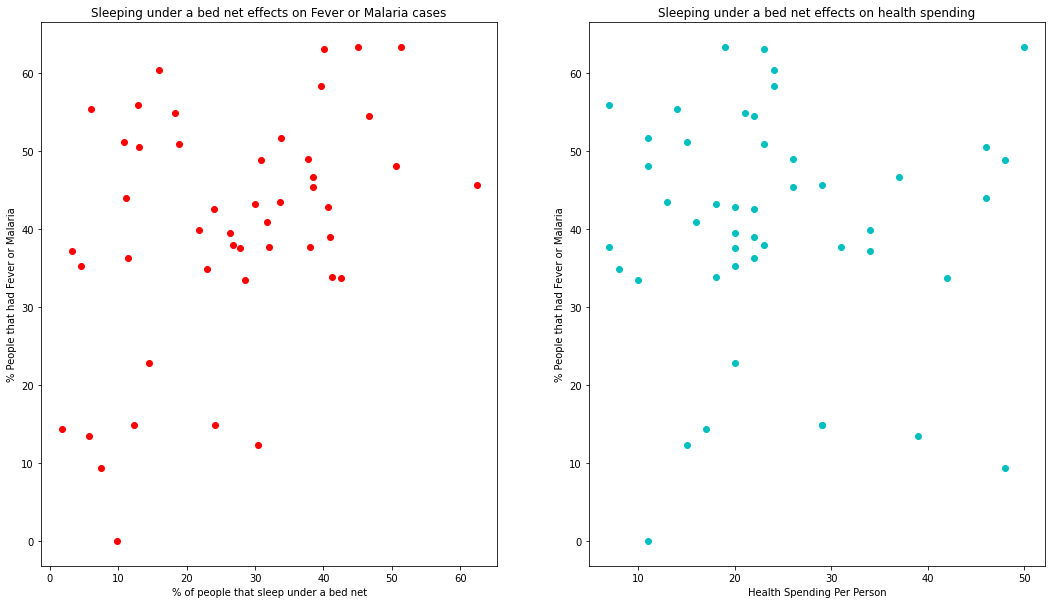

In [68]:
plt.subplots_adjust(left=0.05, bottom=None, right=1.5, top=None, wspace=1, hspace=0.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,10))
bed_net = df_health['% People Sleeping Under A Bed Net']
fever_malaria = df_health['% People That Had a Fever or Malaria']
county = df_health['County'].tolist()

ax1.scatter(bed_net,fever_malaria,label = county, color='r')

ax1.set_title('Sleeping under a bed net effects on Fever or Malaria cases')
ax1.set_ylabel('% People that had Fever or Malaria')
ax1.set_xlabel('% of people that sleep under a bed net')

bed_net = df_health['Health Spending Per Person']
fever_malaria = df_health['% People That Had a Fever or Malaria']
county = df_health['County'].tolist()

ax2.scatter(bed_net,fever_malaria,label = county, color='c')

ax2.set_title('Sleeping under a bed net effects on health spending')
ax2.set_ylabel('% People that had Fever or Malaria')
ax2.set_xlabel('Health Spending Per Person')
fig.savefig('new_data/sleeping_under_bed_net_malaria_scatterplots.png', dpi=300)

We used a boxplot to visualize distributions and outliers for our data and to observe what the variability looks like for the upper and lower quartiles.

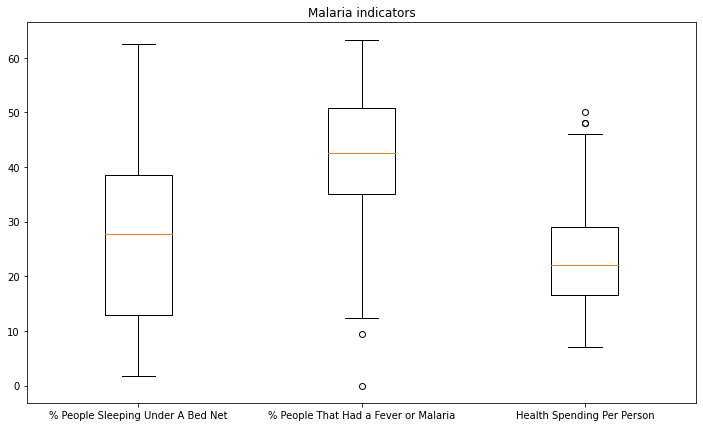

In [69]:
fig = plt.figure(figsize =(12, 7))
ax = fig.add_subplot(111)
plt.boxplot([df_health['% People Sleeping Under A Bed Net'], df_health['% People That Had a Fever or Malaria'], df_health['Health Spending Per Person']])
ax.set_xticklabels(['% People Sleeping Under A Bed Net', '% People That Had a Fever or Malaria',
                    'Health Spending Per Person'])
plt.title("Malaria indicators")
plt.savefig('new_data/malaria_indicators.png', dpi=200)
plt.show()

### Machine Learning

We looked at malaria and education data separately initially. Then we joined the education data with the malaria data (since both were reported per region for same year). We looked at correlations for data aggregated per county and per county and gender, however, the correlations were not strong enough to continue with training a ml model.

We used heatmaps to visualize any correlation between our variables of choice.

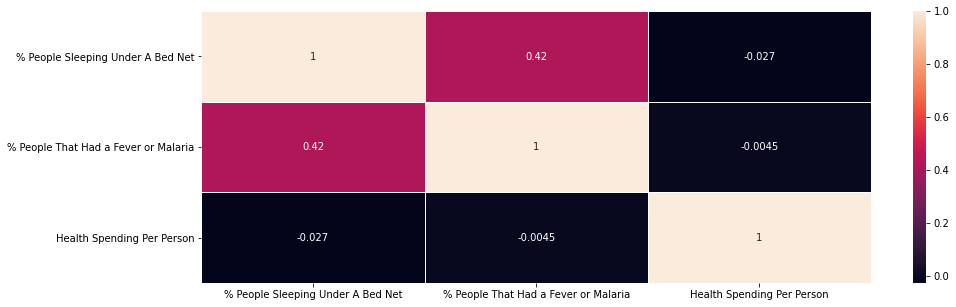

In [70]:
# initial malaria correlations
df_correlation = df_health[['% People Sleeping Under A Bed Net','% People That Had a Fever or Malaria','Health Spending Per Person']]
plt.figure(figsize = (15,5))
correlation_matrix = df_correlation.corr()
sns.heatmap(data = correlation_matrix, annot = True, xticklabels=1, linewidths=.9)
plt.savefig('new_data/malaria_corr_matrix.png', dpi=300)

<AxesSubplot:>

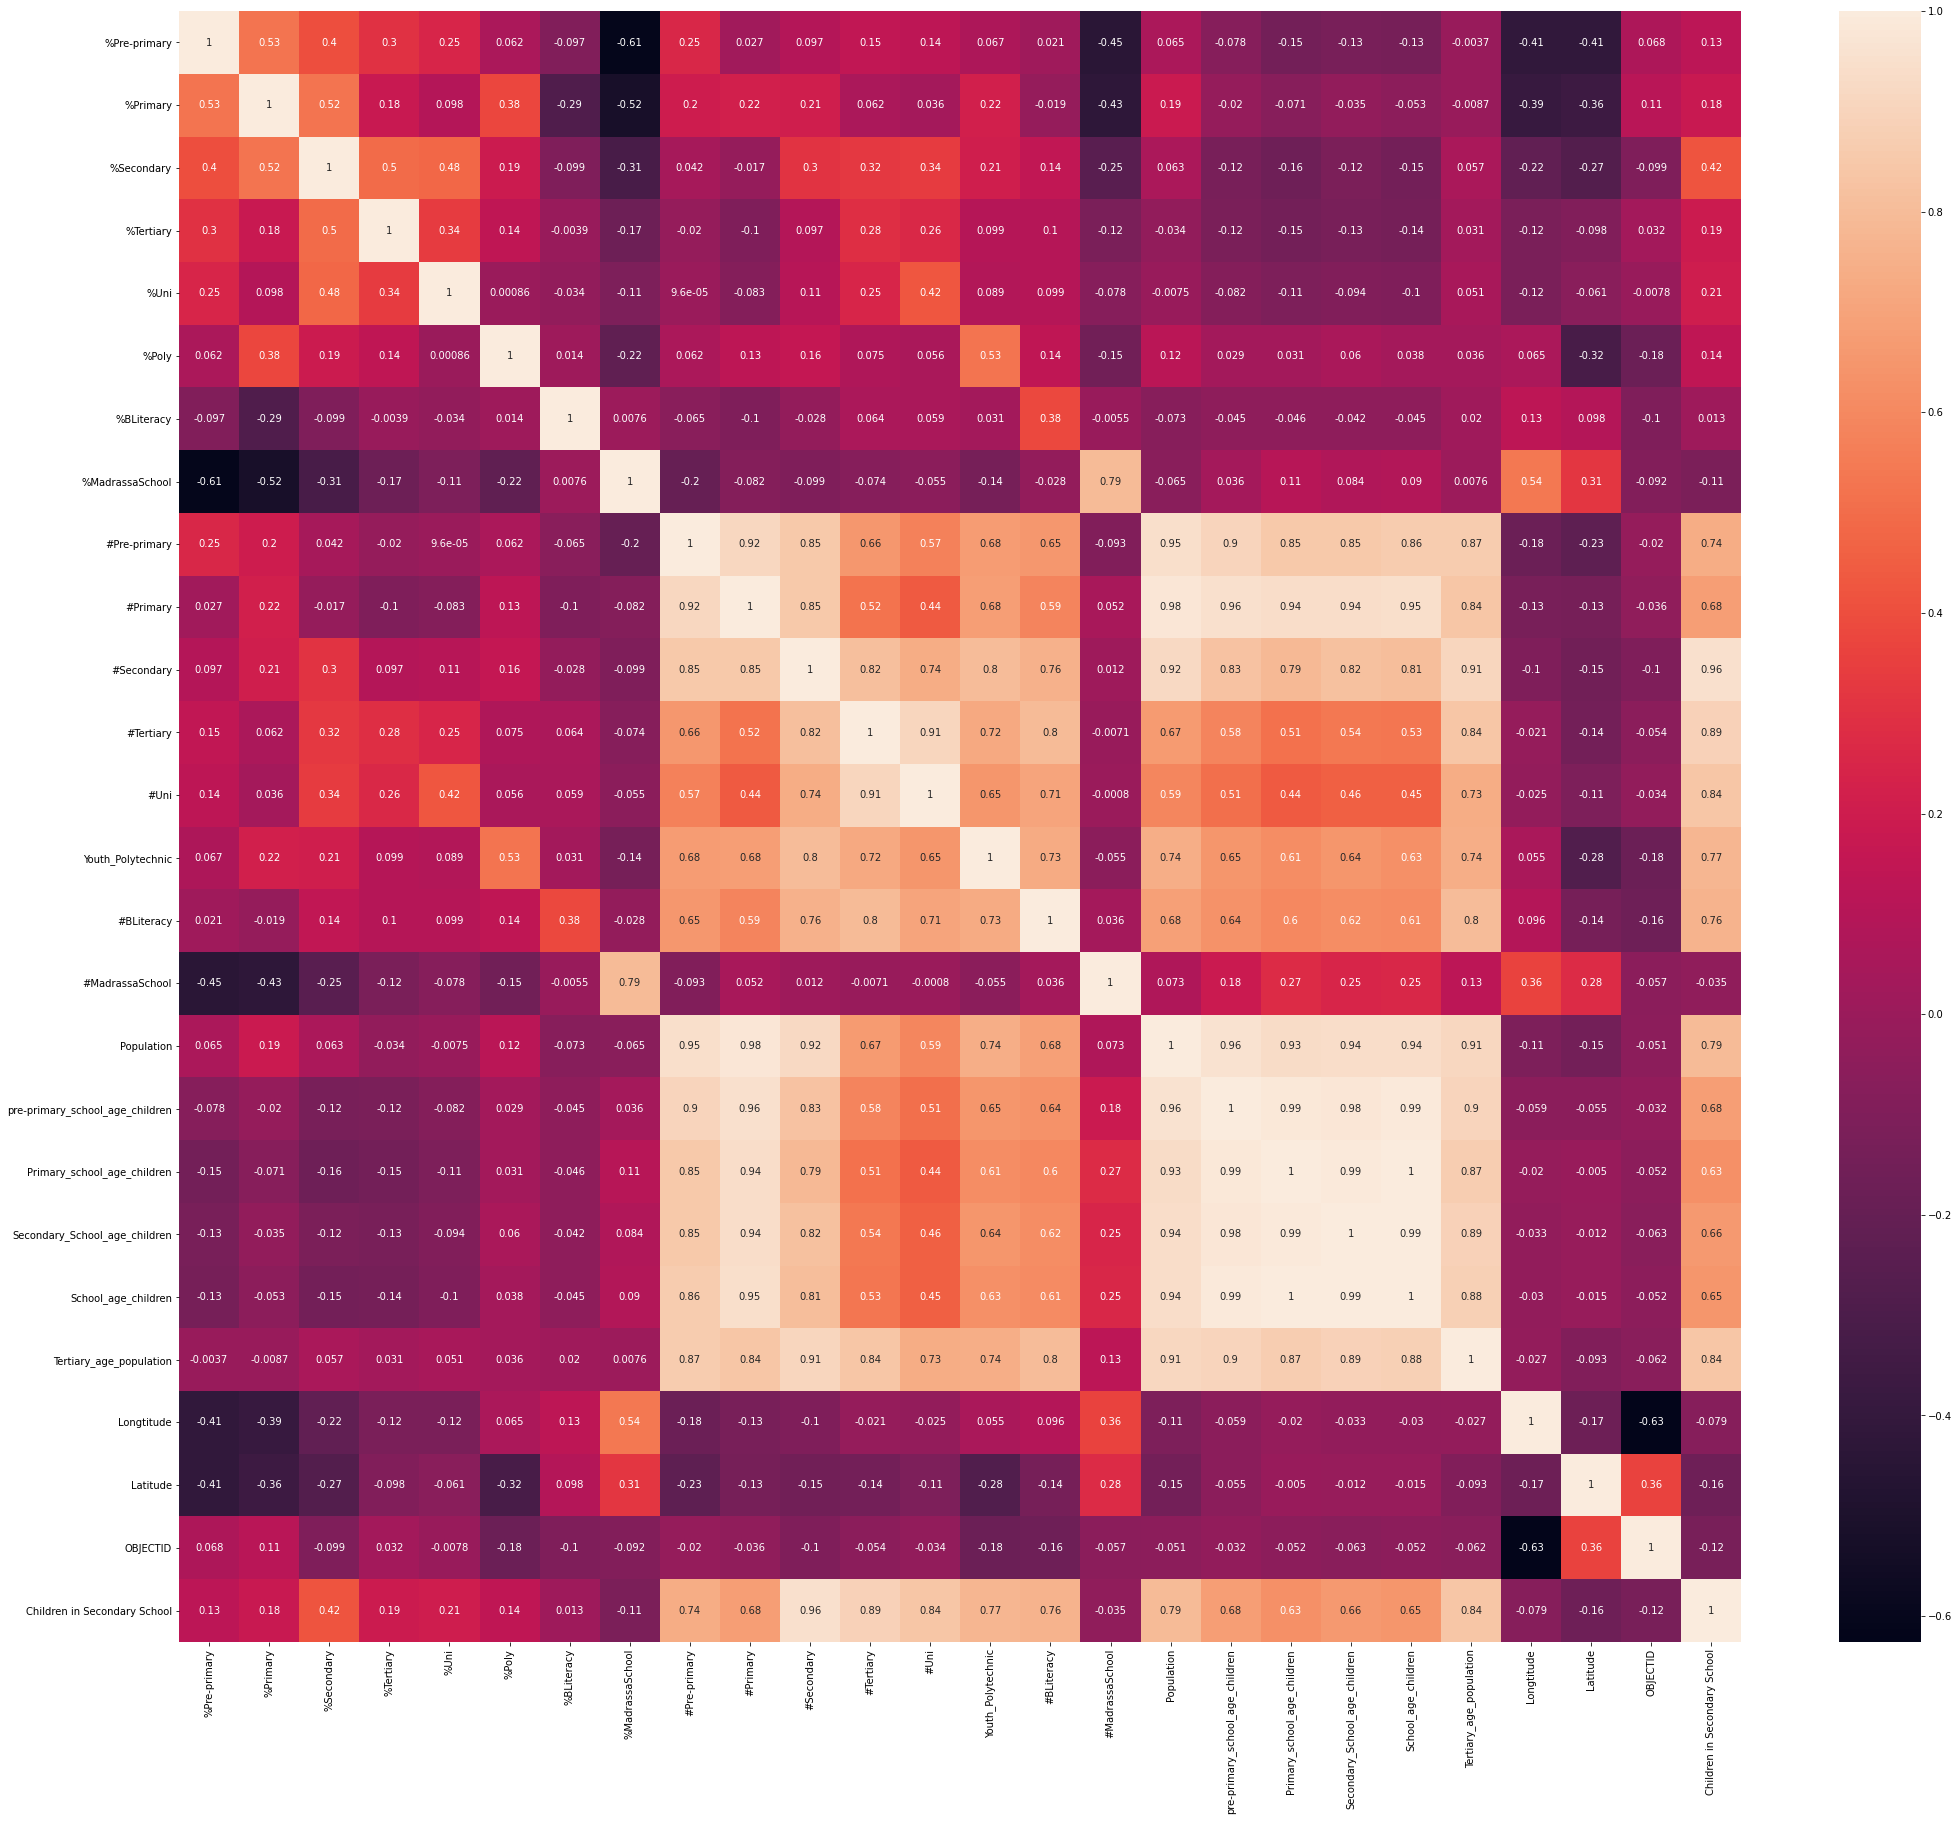

In [71]:
# initial education data correlations
plt.figure(figsize = (35,30))
correlation_matrix = clean_data.corr()
sns.heatmap(data = correlation_matrix, annot = True)

Let's aggregate per county

In [72]:
del df_health['Geolocation']

In [73]:
ed_health = clean_data.set_index('County').join(df_health.set_index('County'))

Let's remove some of the redundant columns and limit the noise

In [74]:
del_cols = ['#Pre-primary', '#Primary', '#Secondary', '#Tertiary', '#Uni', 'Children in Secondary School',
            'MTEF_Sector', 'MTP_Sector', 'Geolocation', 'Province', 'Census_Table', 'Secondary_School_age_children',
            'School_age_children', 'Tertiary_age_population', 'pre-primary_school_age_children', 'Primary_school_age_children',
            '#BLiteracy', 'ObjectID', 'OBJECTID', '%MadrassaSchool', '#MadrassaSchool', 'Youth_Polytechnic']
for d in del_cols:
    del ed_health[d]

<AxesSubplot:>

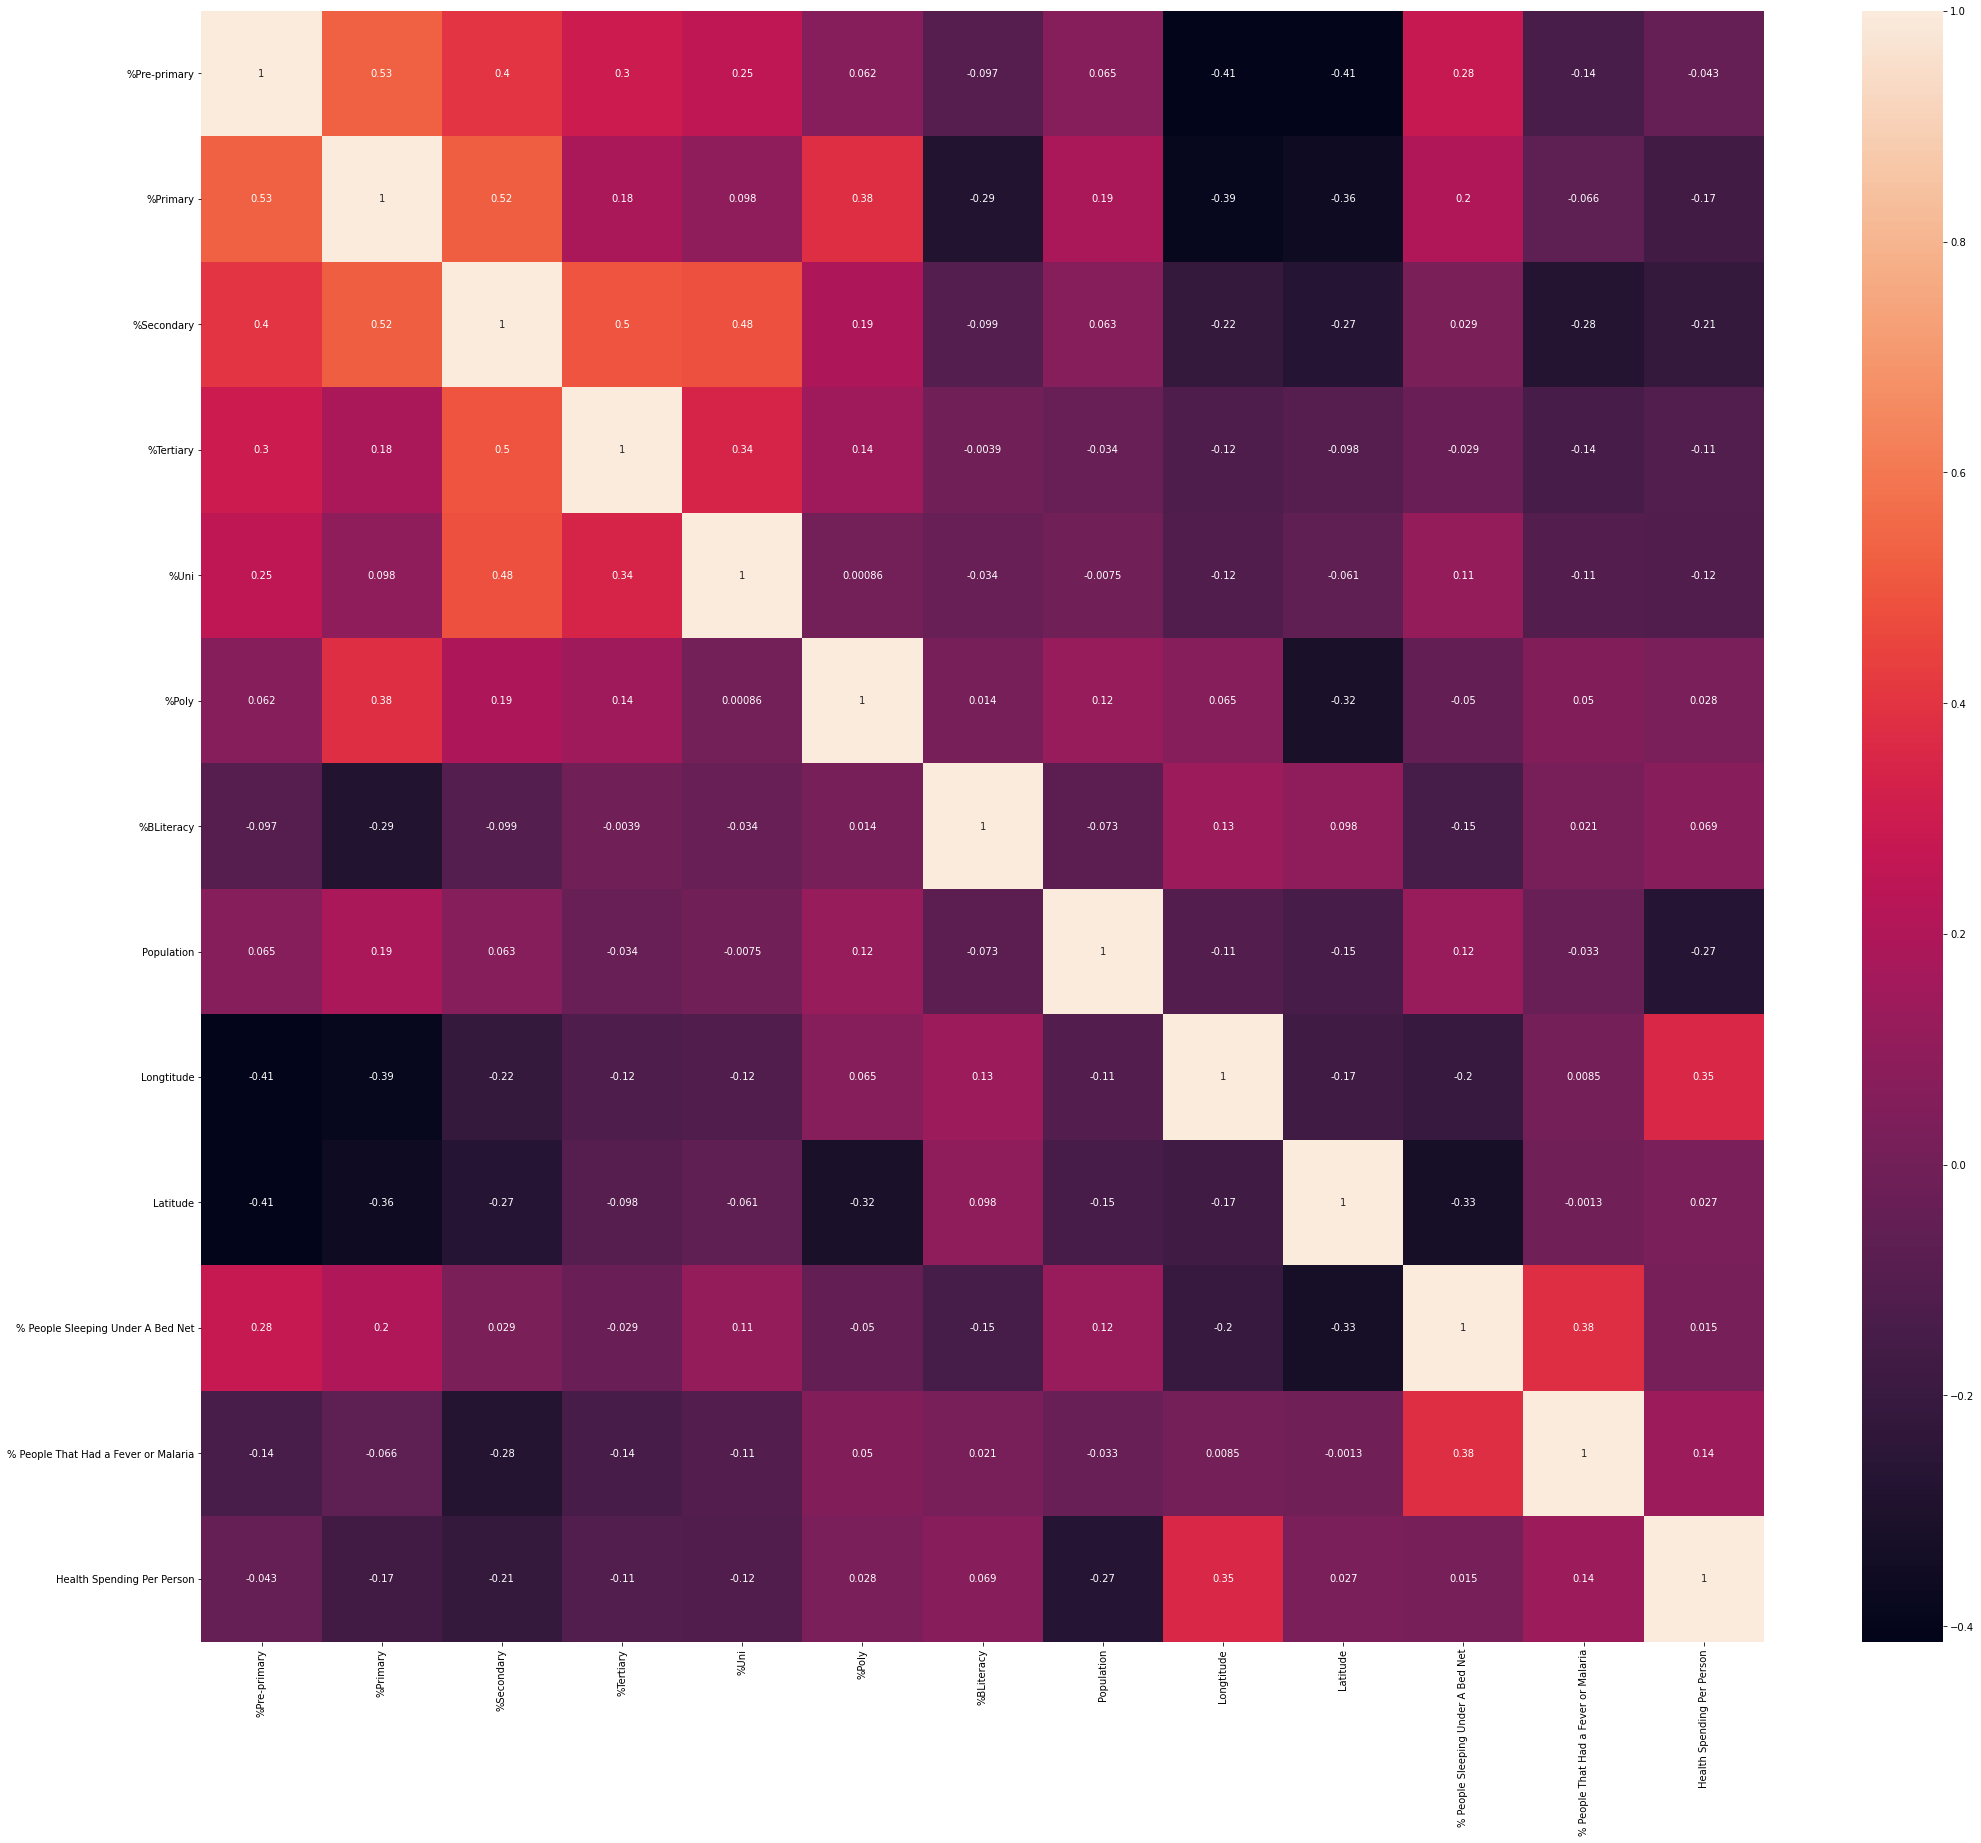

In [75]:
plt.figure(figsize = (35,30))
correlation_matrix = ed_health.corr()
sns.heatmap(data = correlation_matrix, annot = True)

Just like we did for education data, since we are aggregating per county and don't want to assume equal weights for urban/rural female/male, we'll recalculate the percentages. We already have secondary percentages from earlier, we'll calculate the rest

In [76]:
# recalculate the percentages per county
# just like we did with Children in Secondary School earlier in th eeducation section
percent_col_interest = ['%Pre-primary', '%Primary','%Tertiary', '%Uni', '%Poly']
no_col_interest = ['#Pre-primary', '#Primary','#Tertiary', '#Uni', 'Youth_Polytechnic']
new_col_interest = ['Children in Pre-primary School', 'Children in Primary School',
                    'Children in Tertiary School', 'Children in Uni', 'Children in Poly']
# Steps 1 & 2
for i in range(len(new_col_interest)):
    clean_data.insert(len(clean_data.columns), new_col_interest[i], clean_data[percent_col_interest[i]] * clean_data[no_col_interest[i]]/100)

In [77]:
county_ed_data = clean_data.groupby('County').sum()
county_ed_data.head()

%Pre-primary  %Primary  %Secondary  %Tertiary   %Uni  %Poly  \
County                                                                         
Baringo               1307.53   1343.81      626.85     157.71  45.74   7.62   
Bomet                 1074.24   1545.68      642.77      90.85  36.27   8.50   
Bungoma               1748.14   2539.15     1004.93      99.72  56.57  11.77   
Busia                 1830.79   2193.27      832.91      73.59  42.63  15.74   
Elgeyo Marakwet        814.49   1028.01      430.70      74.15  30.11   7.94   

                 %BLiteracy  %MadrassaSchool  #Pre-primary  #Primary  ...  \
County                                                                ...   
Baringo                0.70             0.08       38127.0  147335.0  ...   
Bomet                  1.05             0.03       53441.0  275196.0  ...   
Bungoma                0.77             0.08       84738.0  425597.0  ...   
Busia                  1.82             0.60       50100.0  221071.0  ...   
Elgeyo Marakwet        0.39             0.01       25729.0  115772.0  ...   

                 Tertiary_age_population  Longtitude   Latitude  OBJECTID  \
County                                                                      
Baringo                          53863.0  431.023068   5.805788      5212   
Bomet                            94760.0  423.085619  -8.590993      6042   
Bungoma                         137590.0  693.044136  14.528453     11930   
Busia                            74416.0  615.573363   7.416770     10877   
Elgeyo Marakwet                  35869.0  284.309579   6.292402      3684   

                 Children in Secondary School  Children in Pre-primary School  \
County                                                                          
Baringo                            13551.3290                      43015.2515   
Bomet                              21954.8779                      47316.9724   
Bungoma                            31660.5571                      73660.7419   
Busia                              12950.5246                      49307.0423   
Elgeyo Marakwet                     8241.8840                      27124.8899   

                 Children in Primary School  Children in Tertiary School  \
County                                                                     
Baringo                         177159.5271                     890.6314   
Bomet                           358827.6897                     330.8526   
Bungoma                         544572.4983                     339.9956   
Busia                           273288.8814                      88.8405   
Elgeyo Marakwet                 151526.8757                     213.2773   

                 Children in Uni  Children in Poly  
County                                              
Baringo                  64.5230            2.9982  
Bomet                    48.2951            7.6484  
Bungoma                 101.2731            4.6760  
Busia                    33.4312            6.7092  
Elgeyo Marakwet          32.3441            4.4493  

[5 rows x 31 columns]

In [78]:
# Steps 3 & 4
for i in range(len(new_col_interest)):
    county_ed_data[percent_col_interest[i]] = county_ed_data[new_col_interest[i]]/county_ed_data[no_col_interest[i]] * 100

Now let's join the education and health data (using the county column)

In [79]:
ed_health = county_ed_data.join(df_health.set_index('County'))

In [80]:
ed_health.head()

%Pre-primary    %Primary  %Secondary  %Tertiary      %Uni  \
County                                                                       
Baringo            112.820971  120.242663      626.85  18.663692  4.261757   
Bomet               88.540582  130.389864      642.77   6.433066  2.564796   
Bungoma             86.927638  127.954966     1004.93   5.446029  3.379149   
Busia               98.417250  123.620412      832.91   3.913678  2.726852   
Elgeyo Marakwet    105.425356  130.883871      430.70   9.145682  3.401062   

                    %Poly  %BLiteracy  %MadrassaSchool  #Pre-primary  \
County                                                                 
Baringo          0.866532        0.70             0.08       38127.0   
Bomet            0.953666        1.05             0.03       53441.0   
Bungoma          0.608062        0.77             0.08       84738.0   
Busia            1.019635        1.82             0.60       50100.0   
Elgeyo Marakwet  1.205772        0.39             0.01       25729.0   

                 #Primary  ...  Children in Secondary School  \
County                     ...                                 
Baringo          147335.0  ...                    13551.3290   
Bomet            275196.0  ...                    21954.8779   
Bungoma          425597.0  ...                    31660.5571   
Busia            221071.0  ...                    12950.5246   
Elgeyo Marakwet  115772.0  ...                     8241.8840   

                 Children in Pre-primary School  Children in Primary School  \
County                                                                        
Baringo                              43015.2515                 177159.5271   
Bomet                                47316.9724                 358827.6897   
Bungoma                              73660.7419                 544572.4983   
Busia                                49307.0423                 273288.8814   
Elgeyo Marakwet                      27124.8899                 151526.8757   

                 Children in Tertiary School  Children in Uni  \
County                                                          
Baringo                             890.6314          64.5230   
Bomet                               330.8526          48.2951   
Bungoma                             339.9956         101.2731   
Busia                                88.8405          33.4312   
Elgeyo Marakwet                     213.2773          32.3441   

                 Children in Poly  % People Sleeping Under A Bed Net  \
County                                                                 
Baringo                    2.9982                               24.2   
Bomet                      7.6484                               26.3   
Bungoma                    4.6760                               27.8   
Busia                      6.7092                               40.7   
Elgeyo Marakwet            4.4493                                NaN   

                 % People That Had a Fever or Malaria  \
County                                                  
Baringo                                          14.9   
Bomet                                            39.5   
Bungoma                                          37.6   
Busia                                            42.8   
Elgeyo Marakwet                                   NaN   

                 Health Spending Per Person  ObjectID  
County                                                 
Baringo                                29.0       0.0  
Bomet                                  20.0       1.0  
Bungoma                                20.0       2.0  
Busia                                  20.0       3.0  
Elgeyo Marakwet                         NaN       NaN  

[5 rows x 35 columns]

<AxesSubplot:>

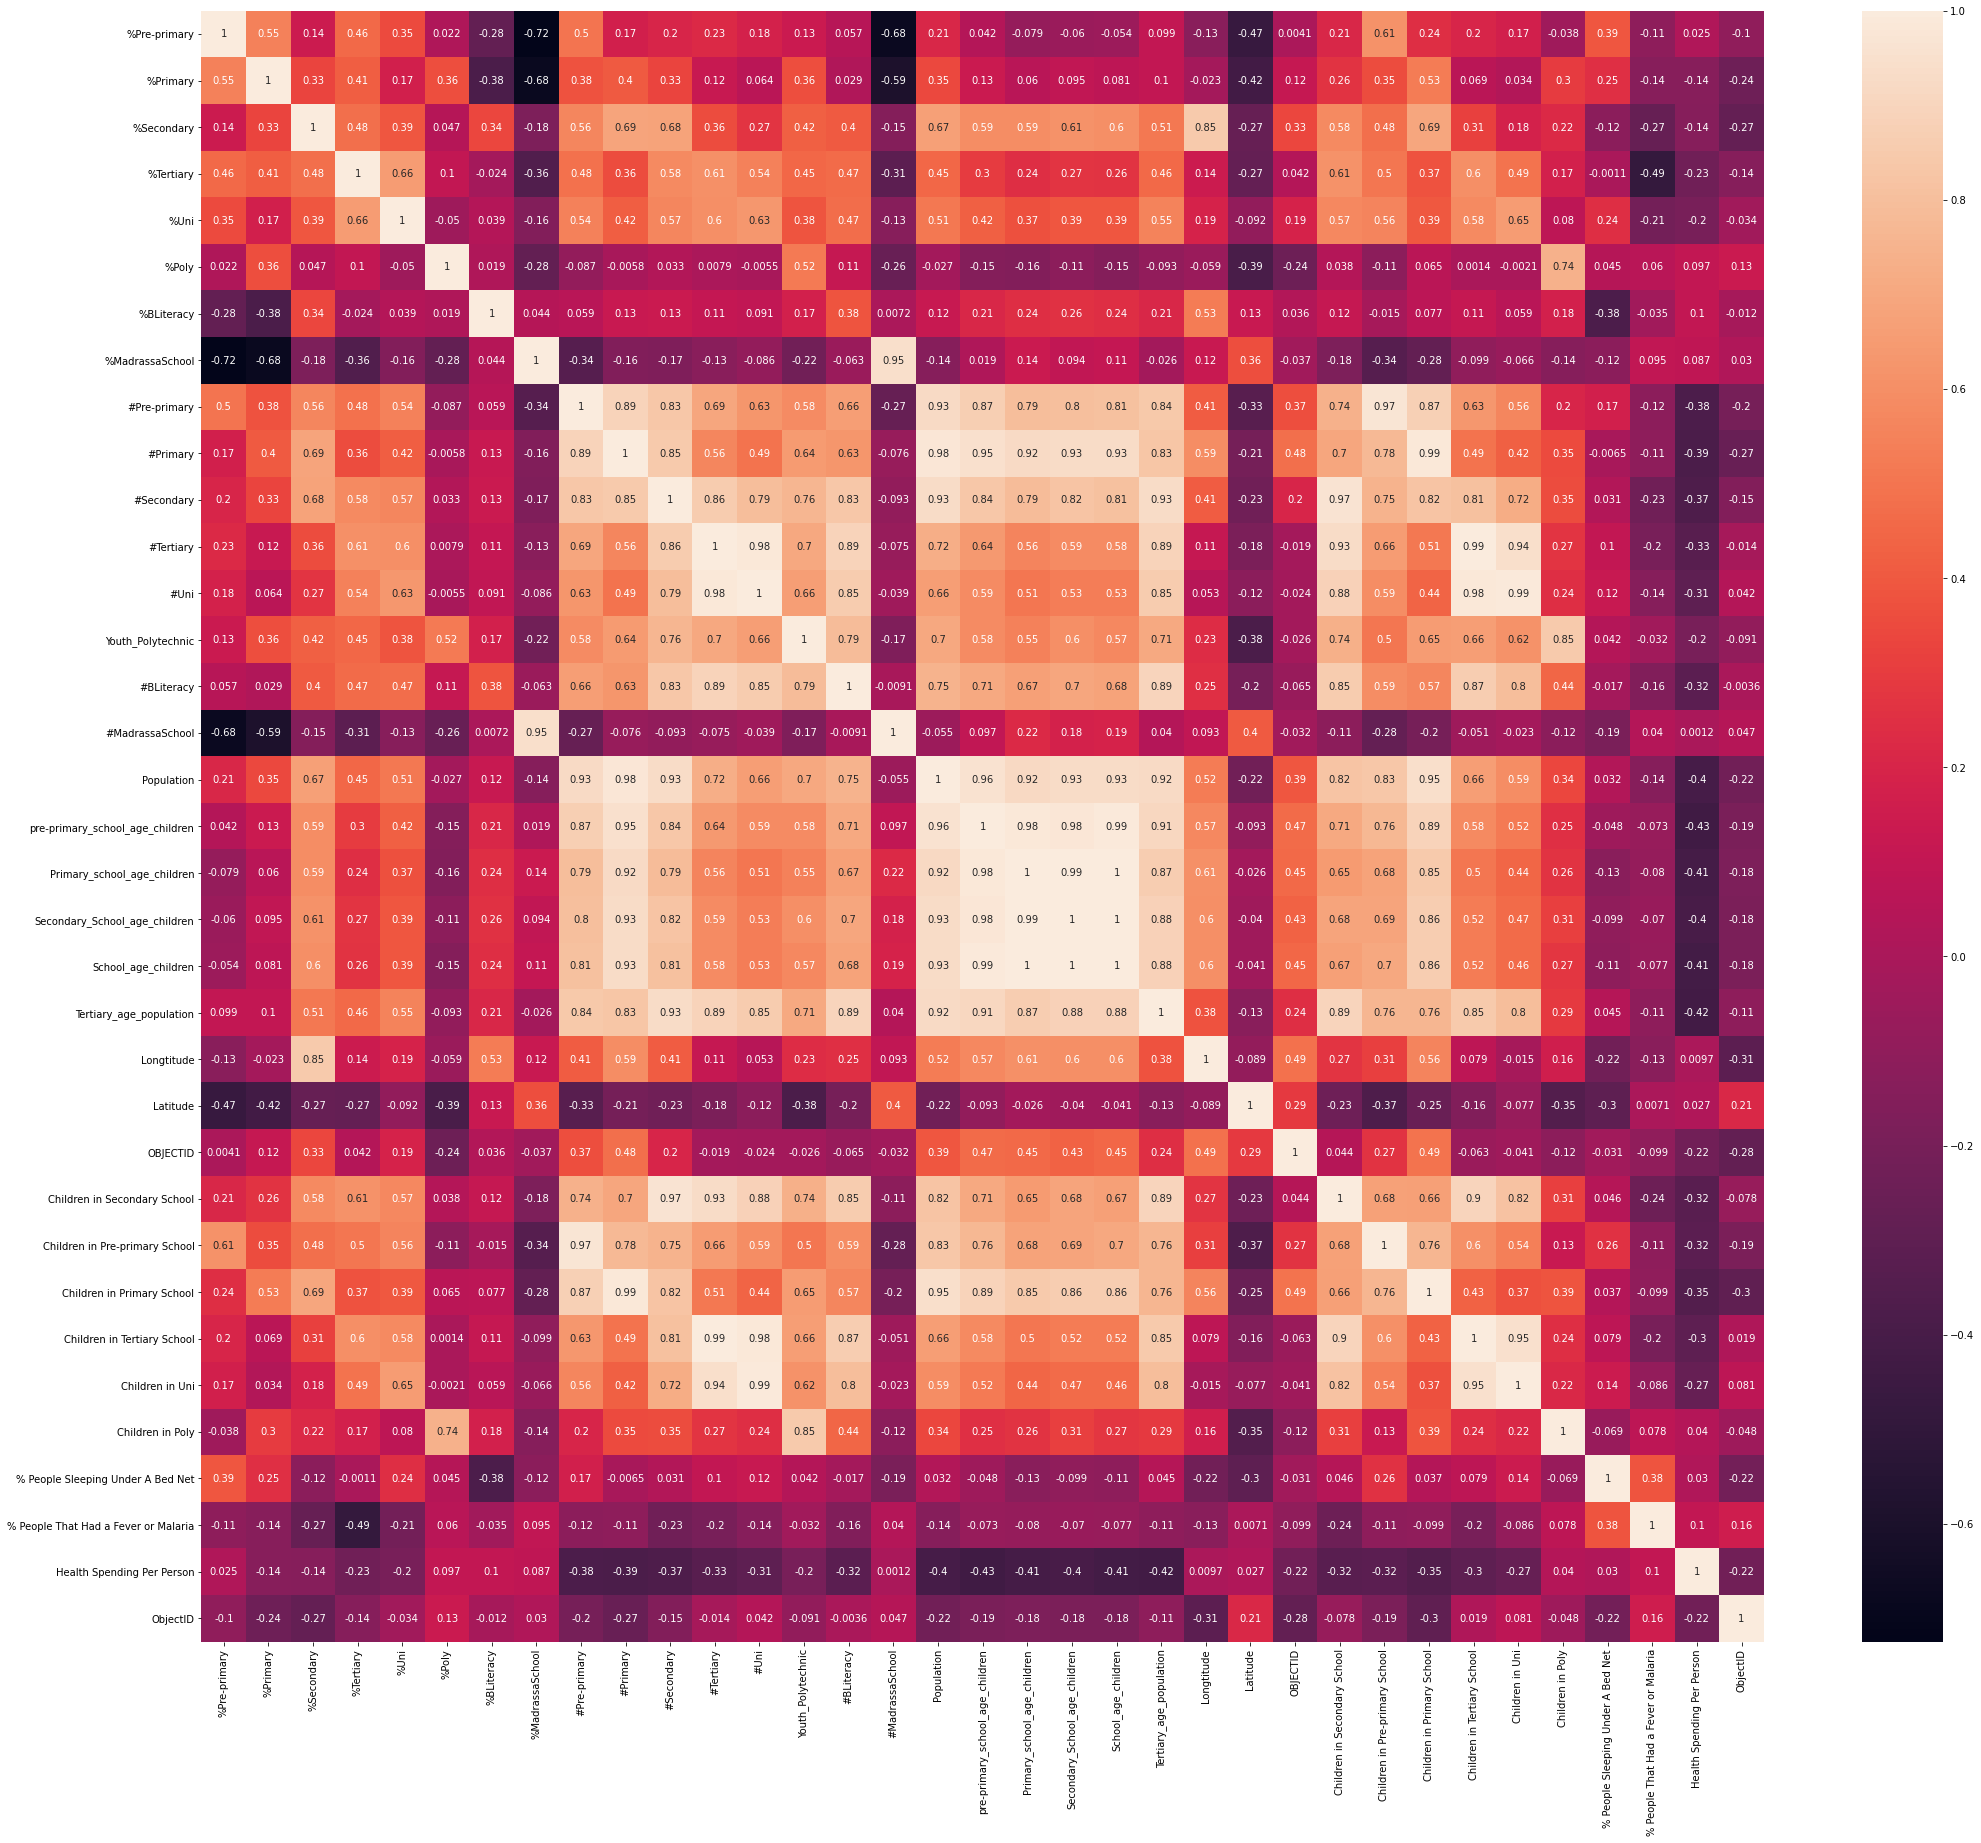

In [81]:
plt.figure(figsize = (35,30))
correlation_matrix = ed_health.corr()
sns.heatmap(data = correlation_matrix, annot = True)

Removing these columns was an iterative process, but to save space and for cleanliness, we combined them below

In [82]:
del_cols = ['#Pre-primary','#Primary', '#Secondary', '#Tertiary', '#Uni', 'Children in Secondary School',
            'Secondary_School_age_children', '%Primary', '%Pre-primary', '%Tertiary', '%Uni', '%Poly',
            'School_age_children', 'Tertiary_age_population', 'pre-primary_school_age_children', 'Primary_school_age_children',
            '#BLiteracy', 'ObjectID', 'OBJECTID', '%MadrassaSchool', '#MadrassaSchool', 'Youth_Polytechnic',
            'Children in Pre-primary School', 'Children in Primary School', 'Children in Tertiary School',
            'Children in Uni', 'Children in Poly', 'Longtitude', 'Latitude', '%BLiteracy', 'Population']
for d in del_cols:
    del ed_health[d]

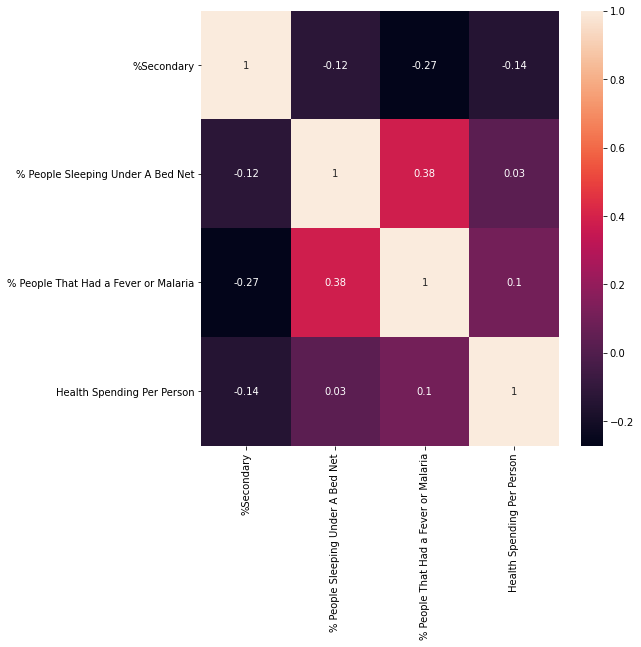

In [83]:
plt.figure(figsize = (8,8))
correlation_matrix = ed_health.corr()
sns.heatmap(data = correlation_matrix, annot = True)
plt.savefig('new_data/edu_malaria_county_corr_matrix.png', dpi=300)
plt.show()

As we see in the heatmap above, none of the correlations are even close to 0.5 (positive or negative). But it's still interesting to see that % of People that had fever or malaria has a slight positive correlation with People that sleep under a bed net, and in a way that makes sense. It indicates that in the areas where malaria and fevers are more frequent, people might choose to sleep under a bed net if they have one available.

Let's try again but by county and gender

In [84]:
county_ed_data = clean_data.groupby(['County', 'Gender']).sum()
county_ed_data.head()

%Pre-primary  %Primary  %Secondary  %Tertiary   %Uni  %Poly  \
County  Gender                                                                
Baringo Female        651.70    666.67      302.22      99.62  15.18   4.21   
        Male          655.83    677.14      324.63      58.09  30.56   3.41   
Bomet   Female        525.52    759.63      299.05      47.99  12.62   4.59   
        Male          548.72    786.05      343.72      42.86  23.65   3.91   
Bungoma Female        868.30   1247.68      466.05      51.22  18.09   5.65   

                %BLiteracy  %MadrassaSchool  #Pre-primary  #Primary  ...  \
County  Gender                                                       ...   
Baringo Female        0.47             0.02       18377.0   71272.0  ...   
        Male          0.23             0.06       19750.0   76063.0  ...   
Bomet   Female        0.70             0.01       25800.0  134661.0  ...   
        Male          0.35             0.02       27641.0  140535.0  ...   
Bungoma Female        0.48             0.04       41774.0  209232.0  ...   

                Tertiary_age_population  Longtitude  Latitude  OBJECTID  \
County  Gender                                                            
Baringo Female                  26578.0  215.511534  2.902894      2609   
        Male                    27285.0  215.511534  2.902894      2603   
Bomet   Female                  50200.0  211.542810 -4.295496      3024   
        Male                    44560.0  211.542810 -4.295496      3018   
Bungoma Female                  71404.0  346.522068  7.264227      5970   

                Children in Secondary School  Children in Pre-primary School  \
County  Gender                                                                 
Baringo Female                     6491.6149                      20652.0085   
        Male                       7059.7141                      22363.2430   
Bomet   Female                     8939.9018                      22479.6111   
        Male                      13014.9761                      24837.3613   
Bungoma Female                    13373.9367                      35957.3344   

                Children in Primary School  Children in Tertiary School  \
County  Gender                                                            
Baringo Female                  85466.3497                     688.1004   
        Male                    91693.1774                     202.5310   
Bomet   Female                 172488.2776                     188.6220   
        Male                   186339.4121                     142.2306   
Bungoma Female                 262610.9561                     197.7463   

                Children in Uni  Children in Poly  
County  Gender                                     
Baringo Female          14.9405            1.7829  
        Male            49.5825            1.2153  
Bomet   Female          10.8673            5.2205  
        Male            37.4278            2.4279  
Bungoma Female          23.2359            1.8263  

[5 rows x 31 columns]

In [85]:
# Steps 3 & 4
for i in range(len(new_col_interest)):
    county_ed_data[percent_col_interest[i]] = county_ed_data[new_col_interest[i]]/county_ed_data[no_col_interest[i]] * 100

In [86]:
ed_health = county_ed_data.join(df_health.set_index('County'))
ed_health.head()

%Pre-primary    %Primary  %Secondary  %Tertiary      %Uni  \
County  Gender                                                              
Baringo Female    112.379651  119.915745      302.22  23.333347  2.797846   
        Male      113.231610  120.548989      324.63  11.109764  5.059439   
Bomet   Female     87.130276  128.090745      299.05   7.032886  1.626841   
        Male       89.856956  132.592886      343.72   5.779382  3.080477   
Bungoma Female     86.075871  125.511851      466.05   5.838391  2.321269   

                   %Poly  %BLiteracy  %MadrassaSchool  #Pre-primary  #Primary  \
County  Gender                                                                  
Baringo Female  0.953422        0.47             0.02       18377.0   71272.0   
        Male    0.764340        0.23             0.06       19750.0   76063.0   
Bomet   Female  1.094444        0.70             0.01       25800.0  134661.0   
        Male    0.747046        0.35             0.02       27641.0  140535.0   
Bungoma Female  0.523295        0.48             0.04       41774.0  209232.0   

                ...  Children in Secondary School  \
County  Gender  ...                                 
Baringo Female  ...                     6491.6149   
        Male    ...                     7059.7141   
Bomet   Female  ...                     8939.9018   
        Male    ...                    13014.9761   
Bungoma Female  ...                    13373.9367   

                Children in Pre-primary School  Children in Primary School  \
County  Gender                                                               
Baringo Female                      20652.0085                  85466.3497   
        Male                        22363.2430                  91693.1774   
Bomet   Female                      22479.6111                 172488.2776   
        Male                        24837.3613                 186339.4121   
Bungoma Female                      35957.3344                 262610.9561   

                Children in Tertiary School  Children in Uni  \
County  Gender                                                 
Baringo Female                     688.1004          14.9405   
        Male                       202.5310          49.5825   
Bomet   Female                     188.6220          10.8673   
        Male                       142.2306          37.4278   
Bungoma Female                     197.7463          23.2359   

                Children in Poly  % People Sleeping Under A Bed Net  \
County  Gender                                                        
Baringo Female            1.7829                               24.2   
        Male              1.2153                               24.2   
Bomet   Female            5.2205                               26.3   
        Male              2.4279                               26.3   
Bungoma Female            1.8263                               27.8   

                % People That Had a Fever or Malaria  \
County  Gender                                         
Baringo Female                                  14.9   
        Male                                    14.9   
Bomet   Female                                  39.5   
        Male                                    39.5   
Bungoma Female                                  37.6   

                Health Spending Per Person  ObjectID  
County  Gender                                        
Baringo Female                        29.0       0.0  
        Male                          29.0       0.0  
Bomet   Female                        20.0       1.0  
        Male                          20.0       1.0  
Bungoma Female                        20.0       2.0  

[5 rows x 35 columns]

In [87]:
female_indices = [i for i in ed_health.index if 'Female' in i]
ed_health.loc[female_indices].head()

%Pre-primary    %Primary  %Secondary  %Tertiary  \
County          Gender                                                    
Baringo         Female    112.379651  119.915745      302.22  23.333347   
Bomet           Female     87.130276  128.090745      299.05   7.032886   
Bungoma         Female     86.075871  125.511851      466.05   5.838391   
Busia           Female     97.549022  121.545205      352.44   3.920116   
Elgeyo Marakwet Female    103.914549  129.491743      210.52  11.515565   

                            %Uni     %Poly  %BLiteracy  %MadrassaSchool  \
County          Gender                                                    
Baringo         Female  2.797846  0.953422        0.47             0.02   
Bomet           Female  1.626841  1.094444        0.70             0.01   
Bungoma         Female  2.321269  0.523295        0.48             0.04   
Busia           Female  1.786108  0.717918        1.10             0.23   
Elgeyo Marakwet Female  2.880463  1.204375        0.21             0.00   

                        #Pre-primary  #Primary  ...  \
County          Gender                          ...   
Baringo         Female       18377.0   71272.0  ...   
Bomet           Female       25800.0  134661.0  ...   
Bungoma         Female       41774.0  209232.0  ...   
Busia           Female       24804.0  109561.0  ...   
Elgeyo Marakwet Female       12537.0   56971.0  ...   

                        Children in Secondary School  \
County          Gender                                 
Baringo         Female                     6491.6149   
Bomet           Female                     8939.9018   
Bungoma         Female                    13373.9367   
Busia           Female                     4413.1168   
Elgeyo Marakwet Female                     4057.2364   

                        Children in Pre-primary School  \
County          Gender                                   
Baringo         Female                      20652.0085   
Bomet           Female                      22479.6111   
Bungoma         Female                      35957.3344   
Busia           Female                      24196.0594   
Elgeyo Marakwet Female                      13027.7670   

                        Children in Primary School  \
County          Gender                               
Baringo         Female                  85466.3497   
Bomet           Female                 172488.2776   
Bungoma         Female                 262610.9561   
Busia           Female                 133166.1422   
Elgeyo Marakwet Female                  73772.7410   

                        Children in Tertiary School  Children in Uni  \
County          Gender                                                 
Baringo         Female                     688.1004          14.9405   
Bomet           Female                     188.6220          10.8673   
Bungoma         Female                     197.7463          23.2359   
Busia           Female                      44.1013           7.5731   
Elgeyo Marakwet Female                     151.8903          10.5713   

                        Children in Poly  % People Sleeping Under A Bed Net  \
County          Gender                                                        
Baringo         Female            1.7829                               24.2   
Bomet           Female            5.2205                               26.3   
Bungoma         Female            1.8263                               27.8   
Busia           Female            1.9312                               40.7   
Elgeyo Marakwet Female            2.3124                                NaN   

                        % People That Had a Fever or Malaria  \
County          Gender                                         
Baringo         Female                                  14.9   
Bomet           Female                                  39.5   
Bungoma         Female                                  37.6   
Busia           Female      

In [88]:
del_cols = ['#Pre-primary','#Primary', '#Secondary', '#Tertiary', '#Uni', '#BLiteracy', 'ObjectID', 'OBJECTID',
            '%MadrassaSchool', '#MadrassaSchool', 'Youth_Polytechnic', 'Children in Secondary School','Secondary_School_age_children','Tertiary_age_population',
            'pre-primary_school_age_children', 'Primary_school_age_children','Children in Pre-primary School','Children in Primary School','Children in Tertiary School',
            'Children in Uni', 'Children in Poly', 'Longtitude', 'Latitude','%BLiteracy', '%Pre-primary', '%Poly', '%Primary', 'School_age_children', 'Population',
            '%Secondary', '%Uni']
for d in del_cols:
    del ed_health[d]

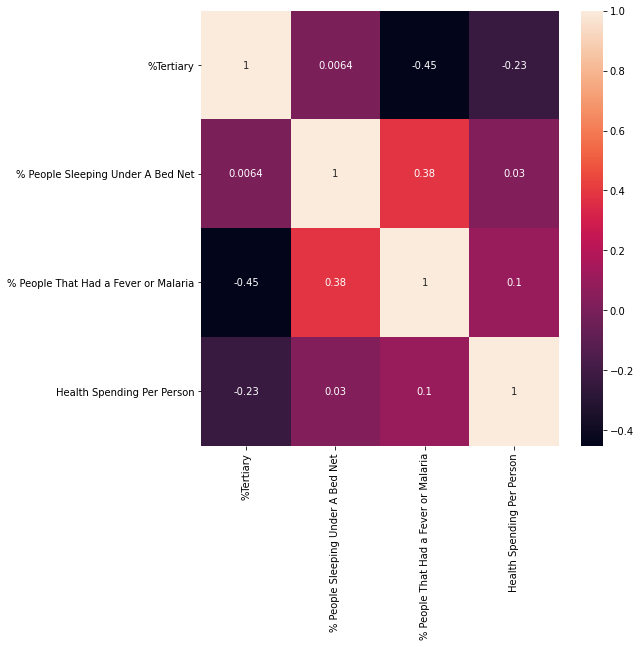

In [89]:
plt.figure(figsize = (8,8))
correlation_matrix = ed_health.corr()
sns.heatmap(data = correlation_matrix, annot = True)
plt.savefig('new_data/female_edu_malaria_county_corr_matrix.png', dpi=300)
plt.show()

The % People that had a fever or malaria leads to a correlation of -0.45 with %Tertiary, but since not lower than -0.5 will not continue. Considering that the -0.45 is close to the upper boundary for a negative correlation, we could speculate that malaria and fever incidence might decrease with increasing levels of education, which (if was significant) would have provided scientific reasoning for advocating for making secondary education and above free or at least affordable.

Trying with male data as well

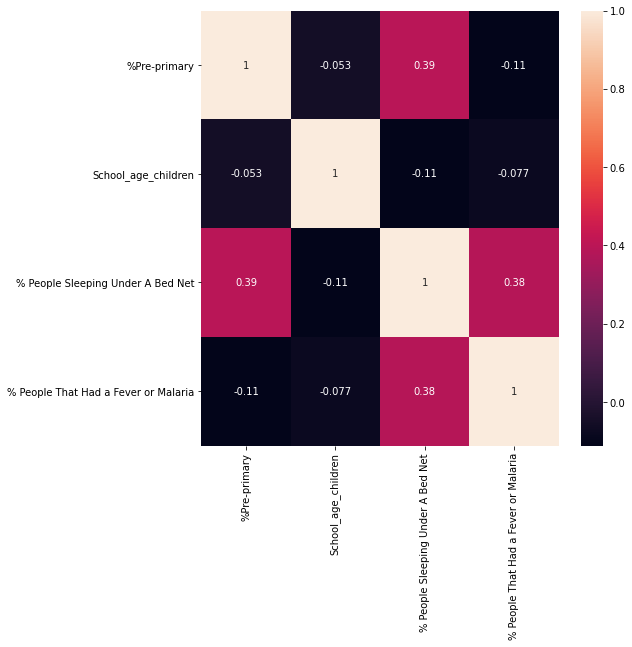

In [90]:
ed_health = county_ed_data.join(df_health.set_index('County'))
male_indices = [i for i in ed_health.index if 'Male' in i]
ed_health.loc[male_indices]
del_cols = ['#Pre-primary','#Primary', '#Secondary', '#Tertiary', '#Uni', '#BLiteracy', 'ObjectID', 'OBJECTID', '%MadrassaSchool', '#MadrassaSchool', 'Youth_Polytechnic',
            'Children in Secondary School','Secondary_School_age_children','Tertiary_age_population', 'pre-primary_school_age_children', 'Primary_school_age_children',
            'Children in Pre-primary School','Children in Primary School','Children in Tertiary School',
            'Children in Uni', 'Children in Poly', 'Longtitude', 'Latitude','%BLiteracy', '%Primary','%Poly',
            'Population', '%Uni', '%Secondary', 'Health Spending Per Person', '%Tertiary']
for d in del_cols:
    del ed_health[d]
    
plt.figure(figsize = (8,8))
correlation_matrix = ed_health.corr()
sns.heatmap(data = correlation_matrix, annot = True)
plt.savefig('new_data/male_edu_malaria_county_corr_matrix.png', dpi=300)
plt.show()

We see that % of people sleeping under a bed net leads to a slight, not signigicant correlation of 0.39 with %Pre-primary school, which could suggest that the younger the child, the more they have the opportunity of sleeping under a bed net - which would make sense.

## Water Contamination
### Summary:

 - Children aged <5 years with diarrhea receiving ORS (%)(1993-2014)
     55% in 2014
 - Number of diarrhea deaths from inadequate water, sanitation and hygiene
     Last data from 2016
 - Number of diarrhea deaths from inadequate water
     Last data from 2016
 - Population using at least basic drinking-water services (%) (2020)
     Total = 62%
     Urban = 87%
     Rural = 52%
 - Population using safely managed drinking-water services (%) (2020)
     Urban data only = 58%

In the next section we used:
- barplots to visualize data that has categories associated with it
- lineplots to visualize timeseries data

### Children aged <5 years with diarrhoea receiving ORS (%) - Indicator: UNICEF_ORS

In [91]:
# calling api
data = get_api_data('https://ghoapi.azureedge.net/api/UNICEF_ORS?$filter=SpatialDim%20eq%20%27KEN%27')
diarrhea = []
index=1

# saving the data to csv
df.to_csv('new_data/children_receiving_ORS.csv')

INFO:root:Your API response was 200. I got the info :)


In [92]:
# load data from csv
df = pd.read_csv('data/children_receiving_ORS.csv')

In [93]:
# creating the df using the data from the api
for i in data['value']:
    diarrhea.append(pd.DataFrame(i, index = [index]))
    index += 1
df = pd.concat(diarrhea)
df.head()

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
1  20740497    UNICEF_ORS        COUNTRY        KEN        YEAR     1993   
2  20740498    UNICEF_ORS        COUNTRY        KEN        YEAR     1998   
3  20740499    UNICEF_ORS        COUNTRY        KEN        YEAR     2000   
4  20740500    UNICEF_ORS        COUNTRY        KEN        YEAR     2003   
5  20740501    UNICEF_ORS        COUNTRY        KEN        YEAR     2009   

  Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value NumericValue   Low  \
1     None  None     None  None  ...          None  31.6         31.6  None   
2     None  None     None  None  ...          None  36.9         36.9  None   
3     None  None     None  None  ...          None  39.2         39.2  None   
4     None  None     None  None  ...          None  29.2         29.2  None   
5     None  None     None  None  ...          None  38.8         38.8  None   

   High           Comments                          Date TimeDimensionValue  \
1  None       KEN_DHS 1993  2019-04-26T14:47:08.08+02:00               1993   
2  None       KEN_DHS 1998   2019-04-26T14:47:08.1+02:00               1998   
3  None      KEN_MICS 2000  2019-04-26T14:47:08.12+02:00               2000   
4  None       KEN_DHS 2003  2019-04-26T14:47:08.14+02:00               2003   
5  None  KEN_DHS 2008-2009  2019-04-26T14:47:08.16+02:00          2008-2009   

          TimeDimensionBegin           TimeDimensionEnd  
1  1993-01-01T00:00:00+01:00  1993-12-31T00:00:00+01:00  
2  1998-01-01T00:00:00+01:00  1998-12-31T00:00:00+01:00  
3  2000-01-01T00:00:00+01:00  2000-12-31T00:00:00+01:00  
4  2003-01-01T00:00:00+01:00  2003-12-31T00:00:00+01:00  
5  2008-01-01T00:00:00+01:00  2009-12-31T00:00:00+01:00  

[5 rows x 23 columns]

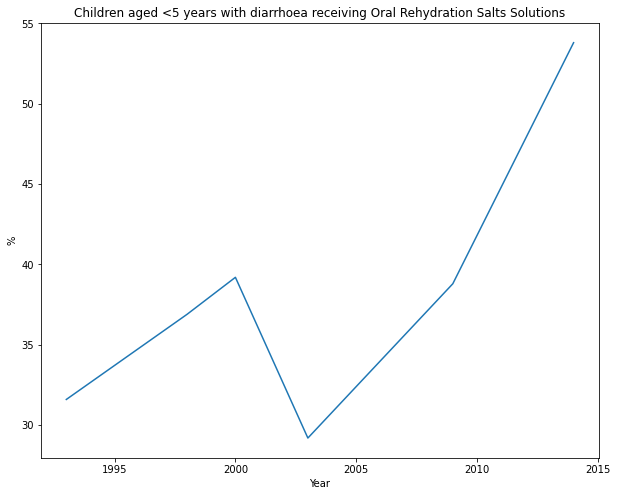

In [94]:
x_values=df.TimeDim
x_values

y_values=df.NumericValue
y_values

plt.figure(figsize = (10,8))
plt.plot(x_values, y_values)

plt.title("Children aged <5 years with diarrhoea receiving Oral Rehydration Salts Solutions")
plt.xlabel("Year")
plt.ylabel("%")
plt.savefig('new_data/children_ORS.png', dpi=300)

### Number of diarrhea deaths from inadequate water, sanitation and hygiene - Indicator: WSH_10

In [95]:
data = get_api_data('https://ghoapi.azureedge.net/api/WSH_10?$filter=SpatialDim%20eq%20%27KEN%27')
diarrhea = []
index=1

# saving the data to csv
df.to_csv('new_data/diarrhea_deaths.csv')

# load data from csv
df = pd.read_csv('data/diarrhea_deaths.csv')

# creating the df using the data from the api
for i in data['value']:
    diarrhea.append(pd.DataFrame(i, index = [index]))
    index += 1
df = pd.concat(diarrhea)
df

INFO:root:Your API response was 200. I got the info :)


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
1  19746842        WSH_10        COUNTRY        KEN        YEAR     2016   
2  19747048        WSH_10        COUNTRY        KEN        YEAR     2016   
3  19747356        WSH_10        COUNTRY        KEN        YEAR     2016   
4  19747381        WSH_10        COUNTRY        KEN        YEAR     2016   

  Dim1Type  Dim1  Dim2Type         Dim2  ... DataSourceDim  \
1      SEX  FMLE  AGEGROUP     YEARSALL  ...          None   
2      SEX   MLE  AGEGROUP     YEARSALL  ...          None   
3      SEX  BTSX  AGEGROUP     YEARSALL  ...          None   
4      SEX  BTSX  AGEGROUP  YEARSUNDER5  ...          None   

                 Value NumericValue          Low         High  Comments  \
1                11826  11825.78603         None         None      None   
2                12366  12365.81075         None         None      None   
3  24192 [18184-29392]  24191.59678  18184.44556  29392.12118      None   
4                 3281   3281.00000         None         None      None   

                            Date TimeDimensionValue  \
1  2018-08-16T15:25:13.597+02:00               2016   
2   2018-08-16T15:25:22.89+02:00               2016   
3   2018-08-16T15:25:34.19+02:00               2016   
4   2018-08-16T15:25:35.03+02:00               2016   

          TimeDimensionBegin           TimeDimensionEnd  
1  2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00  
2  2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00  
3  2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00  
4  2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00  

[4 rows x 23 columns]

In [96]:
diarrhea_deaths = df[(df.Dim1=='BTSX')]
diarrhea_deaths

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
3  19747356        WSH_10        COUNTRY        KEN        YEAR     2016   
4  19747381        WSH_10        COUNTRY        KEN        YEAR     2016   

  Dim1Type  Dim1  Dim2Type         Dim2  ... DataSourceDim  \
3      SEX  BTSX  AGEGROUP     YEARSALL  ...          None   
4      SEX  BTSX  AGEGROUP  YEARSUNDER5  ...          None   

                 Value NumericValue          Low         High  Comments  \
3  24192 [18184-29392]  24191.59678  18184.44556  29392.12118      None   
4                 3281   3281.00000         None         None      None   

                           Date TimeDimensionValue         TimeDimensionBegin  \
3  2018-08-16T15:25:34.19+02:00               2016  2016-01-01T00:00:00+01:00   
4  2018-08-16T15:25:35.03+02:00               2016  2016-01-01T00:00:00+01:00   

            TimeDimensionEnd  
3  2016-12-31T00:00:00+01:00  
4  2016-12-31T00:00:00+01:00  

[2 rows x 23 columns]

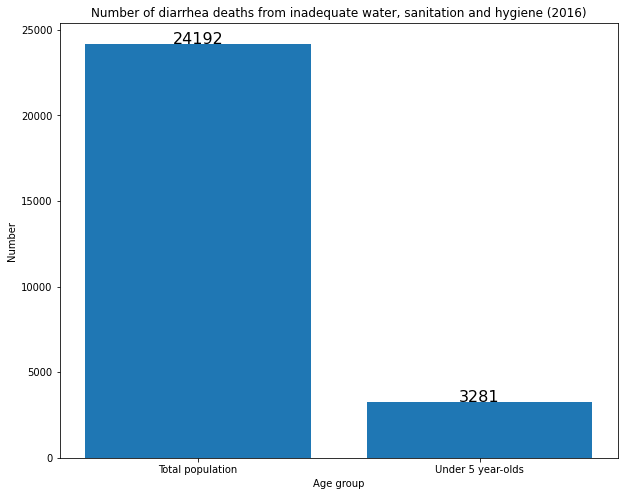

In [97]:
%matplotlib inline

all_years = round(float(diarrhea_deaths[diarrhea_deaths.Dim2=='YEARSALL']['NumericValue']))
under5 = round(float(diarrhea_deaths[diarrhea_deaths.Dim2=='YEARSUNDER5']['NumericValue']))
                                     
y_values=[all_years, under5]
x_names=['Total population', 'Under 5 year-olds']
plt.figure(figsize = (10,8))
plt.bar(x_names,y_values)

# function to add value labels
def addlabels(x_names,y_values):
    for i in range(len(x_names)):
        plt.text(i, y_values[i], y_values[i], ha = 'center', fontsize=16)
            
# calling the function to add value labels
addlabels(x_names, y_values)

plt.title("Number of diarrhea deaths from inadequate water, sanitation and hygiene (2016)")
plt.xlabel("Age group")
plt.ylabel("Number")
plt.savefig('new_data/diarrhea_deaths.png', dpi=300)

### Number of diarrhea deaths from inadequate water - Indicator: WSH_10_WAT

In [98]:
data = get_api_data('https://ghoapi.azureedge.net/api/WSH_10_WAT?$filter=SpatialDim%20eq%20%27KEN%27')
diarrhea = []
index=1

# saving the data to csv
df.to_csv('new_data/inadequate_water.csv')

# load data from csv
df = pd.read_csv('data/inadequate_water.csv')

# creating the df using the data from the api
for i in data['value']:
    diarrhea.append(pd.DataFrame(i, index = [index]))
    index += 1
df = pd.concat(diarrhea)
df

INFO:root:Your API response was 200. I got the info :)


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
1  19744180    WSH_10_WAT        COUNTRY        KEN        YEAR     2016   
2  19744223    WSH_10_WAT        COUNTRY        KEN        YEAR     2016   
3  19744273    WSH_10_WAT        COUNTRY        KEN        YEAR     2016   
4  19744477    WSH_10_WAT        COUNTRY        KEN        YEAR     2016   

  Dim1Type  Dim1  Dim2Type         Dim2  ... DataSourceDim  Value  \
1      SEX  FMLE  AGEGROUP     YEARSALL  ...          None   6523   
2      SEX   MLE  AGEGROUP     YEARSALL  ...          None   6821   
3      SEX  BTSX  AGEGROUP     YEARSALL  ...          None  13343   
4      SEX  BTSX  AGEGROUP  YEARSUNDER5  ...          None   1810   

  NumericValue   Low  High  Comments                           Date  \
1   6522.70037  None  None      None    2018-08-16T14:01:59.2+02:00   
2   6820.55959  None  None      None   2018-08-16T14:02:00.97+02:00   
3  13343.25997  None  None      None   2018-08-16T14:02:02.82+02:00   
4   1810.00000  None  None      None  2018-08-16T14:02:12.147+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
1               2016  2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00  
2               2016  2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00  
3               2016  2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00  
4               2016  2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00  

[4 rows x 23 columns]

In [99]:
diarrhea_deaths_water = df[(df.Dim1=='BTSX')]
diarrhea_deaths_water

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
3  19744273    WSH_10_WAT        COUNTRY        KEN        YEAR     2016   
4  19744477    WSH_10_WAT        COUNTRY        KEN        YEAR     2016   

  Dim1Type  Dim1  Dim2Type         Dim2  ... DataSourceDim  Value  \
3      SEX  BTSX  AGEGROUP     YEARSALL  ...          None  13343   
4      SEX  BTSX  AGEGROUP  YEARSUNDER5  ...          None   1810   

  NumericValue   Low  High  Comments                           Date  \
3  13343.25997  None  None      None   2018-08-16T14:02:02.82+02:00   
4   1810.00000  None  None      None  2018-08-16T14:02:12.147+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
3               2016  2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00  
4               2016  2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00  

[2 rows x 23 columns]

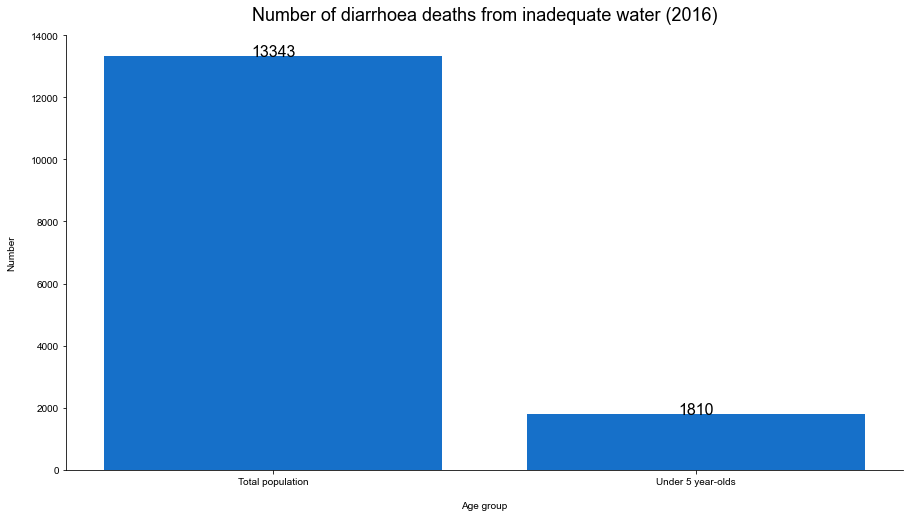

In [100]:
all_years = round(float(diarrhea_deaths_water[diarrhea_deaths_water.Dim2=='YEARSALL']['NumericValue']))
under5 = round(float(diarrhea_deaths_water[diarrhea_deaths_water.Dim2=='YEARSUNDER5']['NumericValue']))
                                
y_values=[all_years, under5]
x_names=['Total population', 'Under 5 year-olds']
plt.bar(x_names,y_values, color='#1670c9')
        
# calling the function to add value labels
addlabels(x_names, y_values)

plt.title("Number of diarrhoea deaths from inadequate water (2016)", fontsize=18, y=1.02)
plt.xlabel("Age group", labelpad=15)
plt.ylabel("Number", labelpad=15)

sns.set(font_scale=1.5)
sns.set_style("white")
sns.despine()
fig = plt.gcf()
fig.set_size_inches(15,8)

plt.savefig('new_data/diarrhea_inadequate_water.png', dpi=300)

### Population using at least basic drinking-water services (%) - Indicator: WSH_WATER_BASIC

In [101]:
data = get_api_data('https://ghoapi.azureedge.net/api/WSH_WATER_BASIC?$filter=SpatialDim%20eq%20%27KEN%27')
water = []
index=1

# saving the data to csv
df.to_csv('new_data/basic_water.csv')

# load data from csv
df = pd.read_csv('data/basic_water.csv')

# creating the df using the data from the api
for i in data['value']:
    water.append(pd.DataFrame(i, index = [index]))
    index += 1
df = pd.concat(water)
df

INFO:root:Your API response was 200. I got the info :)


Id    IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
1   26049311  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2000   
2   26049312  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2000   
3   26049313  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2000   
4   26049314  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2001   
5   26049315  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2001   
..       ...              ...            ...        ...         ...      ...   
59  26049369  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2019   
60  26049370  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2019   
61  26049371  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2020   
62  26049372  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2020   
63  26049373  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2020   

             Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value  \
1   RESIDENCEAREATYPE   RUR     None  None  ...          None    37   
2   RESIDENCEAREATYPE  TOTL     None  None  ...          None    47   
3   RESIDENCEAREATYPE   URB     None  None  ...          None    87   
4   RESIDENCEAREATYPE   RUR     None  None  ...          None    38   
5   RESIDENCEAREATYPE  TOTL     None  None  ...          None    48   
..                ...   ...      ...   ...  ...           ...   ...   
59  RESIDENCEAREATYPE  TOTL     None  None  ...          None    61   
60  RESIDENCEAREATYPE   URB     None  None  ...          None    87   
61  RESIDENCEAREATYPE   RUR     None  None  ...          None    52   
62  RESIDENCEAREATYPE  TOTL     None  None  ...          None    62   
63  RESIDENCEAREATYPE   URB     None  None  ...          None    87   

   NumericValue   Low  High  Comments                           Date  \
1      37.42449  None  None      None  2021-06-23T13:15:39.287+02:00   
2      47.26326  None  None      None    2021-06-23T13:15:39.3+02:00   
3      86.88542  None  None      None  2021-06-23T13:15:39.317+02:00   
4      38.16280  None  None      None  2021-06-23T13:15:39.333+02:00   
5      48.02470  None  None      None  2021-06-23T13:15:39.363+02:00   
..          ...   ...   ...       ...                            ...   
59     60.95448  None  None      None  2021-06-23T13:15:40.507+02:00   
60     86.97083  None  None      None  2021-06-23T13:15:40.523+02:00   
61     51.77998  None  None      None   2021-06-23T13:15:40.54+02:00   
62     61.63289  None  None      None   2021-06-23T13:15:40.57+02:00   
63     86.97523  None  None      None  2021-06-23T13:15:40.583+02:00   

   TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
1                2000  2000-01-01T00:00:00+01:00  2000-12-31T00:00:00+01:00  
2                2000  2000-01-01T00:00:00+01:00  2000-12-31T00:00:00+01:00  
3                2000  2000-01-01T00:00:00+01:00  2000-12-31T00:00:00+01:00  
4                2001  2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00  
5                2001  2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00  
..                ...                        ...                        ...  
59               2019  2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00  
60               2019  2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00  
61               2020  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  
62               2020  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  
63               2020  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  

[63 rows x 23 columns]

In [102]:
basic_water_2020 = df[(df.TimeDim==2020)]
basic_water_2020

Id    IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
61  26049371  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2020   
62  26049372  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2020   
63  26049373  WSH_WATER_BASIC        COUNTRY        KEN        YEAR     2020   

             Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value  \
61  RESIDENCEAREATYPE   RUR     None  None  ...          None    52   
62  RESIDENCEAREATYPE  TOTL     None  None  ...          None    62   
63  RESIDENCEAREATYPE   URB     None  None  ...          None    87   

   NumericValue   Low  High  Comments                           Date  \
61     51.77998  None  None      None   2021-06-23T13:15:40.54+02:00   
62     61.63289  None  None      None   2021-06-23T13:15:40.57+02:00   
63     86.97523  None  None      None  2021-06-23T13:15:40.583+02:00   

   TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
61               2020  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  
62               2020  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  
63               2020  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  

[3 rows x 23 columns]

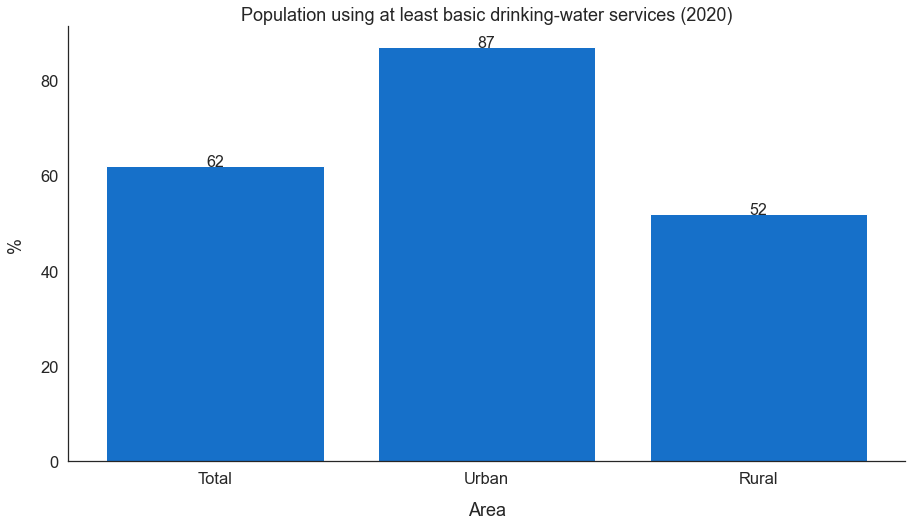

In [103]:
total = round(float(basic_water_2020[basic_water_2020.Dim1=='TOTL']['NumericValue']))
urban = round(float(basic_water_2020[basic_water_2020.Dim1=='URB']['NumericValue']))
rural = round(float(basic_water_2020[basic_water_2020.Dim1=='RUR']['NumericValue']))
                              
y_values=[total, urban, rural]
x_names=['Total', 'Urban', 'Rural']
plt.bar(x_names,y_values, color='#1670c9')
addlabels(x_names, y_values)

plt.title("Population using at least basic drinking-water services (2020)")
plt.xlabel("Area", labelpad=15)
plt.ylabel("%", labelpad=15)

sns.set(font_scale=1.5)
sns.set_style("white")
sns.despine()
fig = plt.gcf()
fig.set_size_inches(15,8)

plt.savefig('new_data/pop_using_basic_drinking_water.png', dpi=300)

### Population using safely managed drinking-water services (%) - Indicator: WSH_WATER_SAFELY_MANAGED

In [104]:
#calling api
data = get_api_data('https://ghoapi.azureedge.net/api/WSH_WATER_SAFELY_MANAGED?$filter=SpatialDim%20eq%20%27KEN%27')
safe_water = []
index=1

# saving the data to csv
df.to_csv('new_data/safe_drinking_water.csv')

# load data from csv
df = pd.read_csv('data/safe_drinking_water.csv')

# creating the df using the data from the api
for i in data['value']:
    safe_water.append(pd.DataFrame(i, index = [index]))
    index += 1
df = pd.concat(safe_water)
df.head()

INFO:root:Your API response was 200. I got the info :)


Id             IndicatorCode SpatialDimType SpatialDim TimeDimType  \
1  26061659  WSH_WATER_SAFELY_MANAGED        COUNTRY        KEN        YEAR   
2  26061660  WSH_WATER_SAFELY_MANAGED        COUNTRY        KEN        YEAR   
3  26061661  WSH_WATER_SAFELY_MANAGED        COUNTRY        KEN        YEAR   
4  26061662  WSH_WATER_SAFELY_MANAGED        COUNTRY        KEN        YEAR   
5  26061663  WSH_WATER_SAFELY_MANAGED        COUNTRY        KEN        YEAR   

   TimeDim           Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value  \
1     2000  RESIDENCEAREATYPE   RUR     None  None  ...          None  None   
2     2000  RESIDENCEAREATYPE  TOTL     None  None  ...          None  None   
3     2000  RESIDENCEAREATYPE   URB     None  None  ...          None    61   
4     2001  RESIDENCEAREATYPE   RUR     None  None  ...          None  None   
5     2001  RESIDENCEAREATYPE  TOTL     None  None  ...          None  None   

  NumericValue   Low  High Comments                           Date  \
1         None  None  None     None  2021-06-23T13:20:37.287+02:00   
2         None  None  None     None    2021-06-23T13:20:37.3+02:00   
3     60.79554  None  None     None  2021-06-23T13:20:37.317+02:00   
4         None  None  None     None  2021-06-23T13:20:37.347+02:00   
5         None  None  None     None  2021-06-23T13:20:37.363+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
1               2000  2000-01-01T00:00:00+01:00  2000-12-31T00:00:00+01:00  
2               2000  2000-01-01T00:00:00+01:00  2000-12-31T00:00:00+01:00  
3               2000  2000-01-01T00:00:00+01:00  2000-12-31T00:00:00+01:00  
4               2001  2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00  
5               2001  2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00  

[5 rows x 23 columns]

In [105]:
safe_water_2020 = df[(df.TimeDim==2020)]
safe_water_2020

Id             IndicatorCode SpatialDimType SpatialDim TimeDimType  \
61  26061719  WSH_WATER_SAFELY_MANAGED        COUNTRY        KEN        YEAR   
62  26061720  WSH_WATER_SAFELY_MANAGED        COUNTRY        KEN        YEAR   
63  26061721  WSH_WATER_SAFELY_MANAGED        COUNTRY        KEN        YEAR   

    TimeDim           Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value  \
61     2020  RESIDENCEAREATYPE   RUR     None  None  ...          None  None   
62     2020  RESIDENCEAREATYPE  TOTL     None  None  ...          None  None   
63     2020  RESIDENCEAREATYPE   URB     None  None  ...          None    58   

   NumericValue   Low  High Comments                           Date  \
61         None  None  None     None   2021-06-23T13:20:38.73+02:00   
62         None  None  None     None  2021-06-23T13:20:38.743+02:00   
63     57.70477  None  None     None   2021-06-23T13:20:38.76+02:00   

   TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
61               2020  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  
62               2020  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  
63               2020  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  

[3 rows x 23 columns]

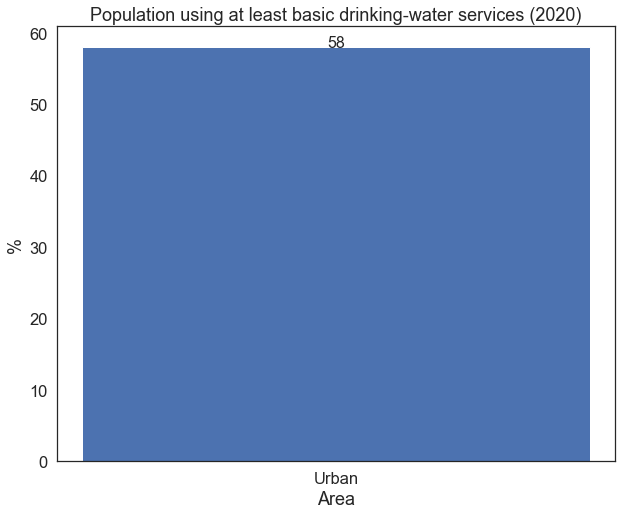

In [106]:
urban = round(float(safe_water_2020[safe_water_2020.Dim1=='URB']['NumericValue']))
#values for total and rural not available
                                     
y_values=[urban]
x_names=['Urban']
plt.figure(figsize = (10,8))
plt.bar(x_names,y_values)
        
# calling the function to add value labels
addlabels(x_names, y_values)

plt.title("Population using at least basic drinking-water services (2020)")
plt.xlabel("Area")
plt.ylabel("%")
plt.savefig('new_data/pop_using_safe_water.png', dpi=300)

## Cholera
### Summary:
Data available includes:
    - Number of reported cases of cholera
    - Number of reported deaths from cholera
    - Cholera case fatality rate
    
Data up to 2016

From the reported cases, we can see that there are still high peaks of disease in some years, which justifies intervention. This can be brought by water desinfection for example (water in the sun in bottles).

### Number of reported cases of cholera - Indicator: CHOLERA_0000000001
Up to 2016

In [107]:
data = get_api_data('https://ghoapi.azureedge.net/api/CHOLERA_0000000001?$filter=SpatialDim%20eq%20%27KEN%27')
rpt_cholera = []
index=1

# saving the data to csv
df.to_csv('new_data/cholera_cases_1971_2016.csv')

# load data from csv
df = pd.read_csv('data/cholera_cases_1971_2016.csv')

# creating the df using the data from the api
for i in data['value']:
    rpt_cholera.append(pd.DataFrame(i, index = [index]))
    index += 1
df_rpt_cholera = pd.concat(rpt_cholera)
df_rpt_cholera
df_rpt_cholera.head()

INFO:root:Your API response was 200. I got the info :)


Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
1  437441  CHOLERA_0000000001        COUNTRY        KEN        YEAR     1994   
2  437525  CHOLERA_0000000001        COUNTRY        KEN        YEAR     1995   
3  437580  CHOLERA_0000000001        COUNTRY        KEN        YEAR     1971   
4  437623  CHOLERA_0000000001        COUNTRY        KEN        YEAR     1972   
5  437696  CHOLERA_0000000001        COUNTRY        KEN        YEAR     1974   

  Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value NumericValue   Low  \
1     None  None     None  None  ...          None   880         None  None   
2     None  None     None  None  ...          None  1547         None  None   
3     None  None     None  None  ...          None   239         None  None   
4     None  None     None  None  ...          None    51         None  None   
5     None  None     None  None  ...          None   402         None  None   

   High Comments                           Date TimeDimensionValue  \
1  None     None  2013-06-11T14:04:28.647+02:00               1994   
2  None     None  2013-06-11T14:04:28.647+02:00               1995   
3  None     None  2013-06-11T14:04:28.647+02:00               1971   
4  None     None  2013-06-11T14:04:28.647+02:00               1972   
5  None     None  2013-06-11T14:04:28.647+02:00               1974   

          TimeDimensionBegin           TimeDimensionEnd  
1  1994-01-01T00:00:00+01:00  1994-12-31T00:00:00+01:00  
2  1995-01-01T00:00:00+01:00  1995-12-31T00:00:00+01:00  
3  1971-01-01T00:00:00+01:00  1971-12-31T00:00:00+01:00  
4  1972-01-01T00:00:00+01:00  1972-12-31T00:00:00+01:00  
5  1974-01-01T00:00:00+01:00  1974-12-31T00:00:00+01:00  

[5 rows x 23 columns]

In [108]:
ordered_by_year = df_rpt_cholera.sort_values(by =['TimeDim'], ascending=True)
ordered_by_year.head()

Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
3  437580  CHOLERA_0000000001        COUNTRY        KEN        YEAR     1971   
4  437623  CHOLERA_0000000001        COUNTRY        KEN        YEAR     1972   
5  437696  CHOLERA_0000000001        COUNTRY        KEN        YEAR     1974   
6  437735  CHOLERA_0000000001        COUNTRY        KEN        YEAR     1975   
7  437771  CHOLERA_0000000001        COUNTRY        KEN        YEAR     1976   

  Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value NumericValue   Low  \
3     None  None     None  None  ...          None   239         None  None   
4     None  None     None  None  ...          None    51         None  None   
5     None  None     None  None  ...          None   402         None  None   
6     None  None     None  None  ...          None  1093         None  None   
7     None  None     None  None  ...          None  1359         None  None   

   High Comments                           Date TimeDimensionValue  \
3  None     None  2013-06-11T14:04:28.647+02:00               1971   
4  None     None  2013-06-11T14:04:28.647+02:00               1972   
5  None     None  2013-06-11T14:04:28.647+02:00               1974   
6  None     None  2013-06-11T14:04:28.647+02:00               1975   
7  None     None  2013-06-11T14:04:28.647+02:00               1976   

          TimeDimensionBegin           TimeDimensionEnd  
3  1971-01-01T00:00:00+01:00  1971-12-31T00:00:00+01:00  
4  1972-01-01T00:00:00+01:00  1972-12-31T00:00:00+01:00  
5  1974-01-01T00:00:00+01:00  1974-12-31T00:00:00+01:00  
6  1975-01-01T00:00:00+01:00  1975-12-31T00:00:00+01:00  
7  1976-01-01T00:00:00+01:00  1976-12-31T00:00:00+01:00  

[5 rows x 23 columns]

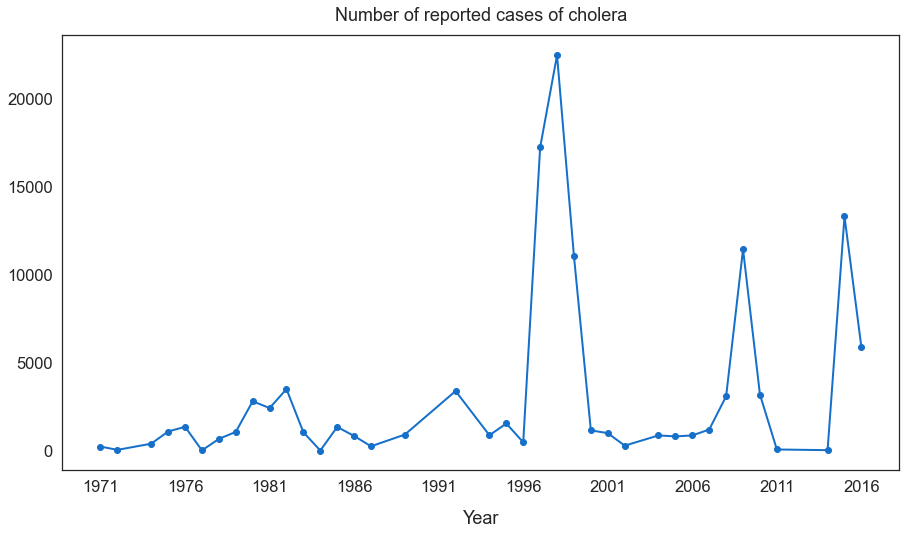

In [109]:
x_values=ordered_by_year.TimeDim
y_values=ordered_by_year.Value.astype(float)

plt.plot(x_values, y_values, 'o-', lw=2, c='#1670c9')

plt.title("Number of reported cases of cholera", fontsize=18, y=1.02) #y adjusts padding between graph and title
plt.xlabel("Year", labelpad=15)
plt.xticks(np.arange(min(x_values), max(x_values)+1, 5.0))

sns.set(font_scale=1.5)
fig = plt.gcf()
fig.set_size_inches(15,8)

# missing data for years:
# 1973, 1990, 1991, 1993, 2003, 2012, 2013
plt.savefig('new_data/cholera_cases.png', dpi=300, bbox_inches='tight')

In [110]:
fig = go.Figure([go.Scatter(x=ordered_by_year['TimeDim'], y=ordered_by_year['Value'])])
fig.update_xaxes(type='date', title_text='Year')
fig.update_yaxes(type='linear', title_text='Number of cases')
fig.update_layout(title_text="Number of reported cases of cholera", title_x=0.5)
plt.savefig('new_data/cholera_cases_plotly.png', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

### Number of reported deaths from cholera - Indicator: CHOLERA_0000000002
Up to 2016

In [111]:
data = get_api_data('https://ghoapi.azureedge.net/api/CHOLERA_0000000002?$filter=SpatialDim%20eq%20%27KEN%27')
rpt_deaths_cholera = []
index=1

# saving the data to csv
df.to_csv('new_data/cholera_deaths.csv')

# load data from csv
df = pd.read_csv('data/cholera_deaths.csv')

# creating the df using the data from the api
for i in data['value']:
    rpt_deaths_cholera.append(pd.DataFrame(i, index = [index]))
    index += 1
df = pd.concat(rpt_deaths_cholera)
#df
df.head()

INFO:root:Your API response was 200. I got the info :)


Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
1  257897  CHOLERA_0000000002        COUNTRY        KEN        YEAR     1994   
2  257979  CHOLERA_0000000002        COUNTRY        KEN        YEAR     1995   
3  258032  CHOLERA_0000000002        COUNTRY        KEN        YEAR     1971   
4  258074  CHOLERA_0000000002        COUNTRY        KEN        YEAR     1972   
5  258144  CHOLERA_0000000002        COUNTRY        KEN        YEAR     1974   

  Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value NumericValue   Low  \
1     None  None     None  None  ...          None    28         28.0  None   
2     None  None     None  None  ...          None    39         39.0  None   
3     None  None     None  None  ...          None    38         38.0  None   
4     None  None     None  None  ...          None     0          0.0  None   
5     None  None     None  None  ...          None    20         20.0  None   

   High  Comments                         Date TimeDimensionValue  \
1  None      None  2013-06-11T14:01:25.3+02:00               1994   
2  None      None  2013-06-11T14:01:25.3+02:00               1995   
3  None      None  2013-06-11T14:01:25.3+02:00               1971   
4  None      None  2013-06-11T14:01:25.3+02:00               1972   
5  None      None  2013-06-11T14:01:25.3+02:00               1974   

          TimeDimensionBegin           TimeDimensionEnd  
1  1994-01-01T00:00:00+01:00  1994-12-31T00:00:00+01:00  
2  1995-01-01T00:00:00+01:00  1995-12-31T00:00:00+01:00  
3  1971-01-01T00:00:00+01:00  1971-12-31T00:00:00+01:00  
4  1972-01-01T00:00:00+01:00  1972-12-31T00:00:00+01:00  
5  1974-01-01T00:00:00+01:00  1974-12-31T00:00:00+01:00  

[5 rows x 23 columns]

In [112]:
ordered_by_year = df.sort_values(by =['TimeDim'], ascending=True)
ordered_by_year.head()

Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
3  258032  CHOLERA_0000000002        COUNTRY        KEN        YEAR     1971   
4  258074  CHOLERA_0000000002        COUNTRY        KEN        YEAR     1972   
5  258144  CHOLERA_0000000002        COUNTRY        KEN        YEAR     1974   
6  258180  CHOLERA_0000000002        COUNTRY        KEN        YEAR     1975   
7  258215  CHOLERA_0000000002        COUNTRY        KEN        YEAR     1976   

  Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value NumericValue   Low  \
3     None  None     None  None  ...          None    38         38.0  None   
4     None  None     None  None  ...          None     0          0.0  None   
5     None  None     None  None  ...          None    20         20.0  None   
6     None  None     None  None  ...          None    74         74.0  None   
7     None  None     None  None  ...          None    59         59.0  None   

   High  Comments                         Date TimeDimensionValue  \
3  None      None  2013-06-11T14:01:25.3+02:00               1971   
4  None      None  2013-06-11T14:01:25.3+02:00               1972   
5  None      None  2013-06-11T14:01:25.3+02:00               1974   
6  None      None  2013-06-11T14:01:25.3+02:00               1975   
7  None      None  2013-06-11T14:01:25.3+02:00               1976   

          TimeDimensionBegin           TimeDimensionEnd  
3  1971-01-01T00:00:00+01:00  1971-12-31T00:00:00+01:00  
4  1972-01-01T00:00:00+01:00  1972-12-31T00:00:00+01:00  
5  1974-01-01T00:00:00+01:00  1974-12-31T00:00:00+01:00  
6  1975-01-01T00:00:00+01:00  1975-12-31T00:00:00+01:00  
7  1976-01-01T00:00:00+01:00  1976-12-31T00:00:00+01:00  

[5 rows x 23 columns]

In [113]:
fig = go.Figure([go.Scatter(x=ordered_by_year['TimeDim'], y=ordered_by_year['Value'])])
fig.update_xaxes(type='date', title_text='Year')
fig.update_yaxes(type='linear', title_text='Number of reported deaths')
fig.update_layout(title_text="Number of reported deaths from cholera", title_x=0.5)
plt.savefig('new_data/cholera_deaths.png', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>

Same data as Cholera - number of reported cases - Indicator: WHS3_40

### Cholera case fatality rate - Indicator: CHOLERA_0000000003
up to 2016

In [114]:
data = get_api_data('https://ghoapi.azureedge.net/api/CHOLERA_0000000003?$filter=SpatialDim%20eq%20%27KEN%27')
fat_rate_cholera = []
index=1

# saving the data to csv
df.to_csv('new_data/cholera_fatality_rate.csv')

# load data from csv
df = pd.read_csv('data/cholera_fatality_rate.csv')

for i in data['value']:
    fat_rate_cholera.append(pd.DataFrame(i, index = [index]))
    index += 1
df = pd.concat(fat_rate_cholera)
#df
df.head()

INFO:root:Your API response was 200. I got the info :)


Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
1  439692  CHOLERA_0000000003        COUNTRY        KEN        YEAR     1994   
2  439774  CHOLERA_0000000003        COUNTRY        KEN        YEAR     1995   
3  439827  CHOLERA_0000000003        COUNTRY        KEN        YEAR     1971   
4  439868  CHOLERA_0000000003        COUNTRY        KEN        YEAR     1972   
5  439938  CHOLERA_0000000003        COUNTRY        KEN        YEAR     1974   

  Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value NumericValue   Low  \
1     None  None     None  None  ...          None  3.18         None  None   
2     None  None     None  None  ...          None  2.52         None  None   
3     None  None     None  None  ...          None  15.9         None  None   
4     None  None     None  None  ...          None     0         None  None   
5     None  None     None  None  ...          None  4.98         None  None   

   High Comments                           Date TimeDimensionValue  \
1  None     None  2013-06-11T14:04:28.647+02:00               1994   
2  None     None  2013-06-11T14:04:28.647+02:00               1995   
3  None     None  2013-06-11T14:04:28.647+02:00               1971   
4  None     None  2013-06-11T14:04:28.647+02:00               1972   
5  None     None  2013-06-11T14:04:28.647+02:00               1974   

          TimeDimensionBegin           TimeDimensionEnd  
1  1994-01-01T00:00:00+01:00  1994-12-31T00:00:00+01:00  
2  1995-01-01T00:00:00+01:00  1995-12-31T00:00:00+01:00  
3  1971-01-01T00:00:00+01:00  1971-12-31T00:00:00+01:00  
4  1972-01-01T00:00:00+01:00  1972-12-31T00:00:00+01:00  
5  1974-01-01T00:00:00+01:00  1974-12-31T00:00:00+01:00  

[5 rows x 23 columns]

In [115]:
ordered_by_year = df.sort_values(by =['TimeDim'], ascending=True)
ordered_by_year.head()

Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  TimeDim  \
3  439827  CHOLERA_0000000003        COUNTRY        KEN        YEAR     1971   
4  439868  CHOLERA_0000000003        COUNTRY        KEN        YEAR     1972   
5  439938  CHOLERA_0000000003        COUNTRY        KEN        YEAR     1974   
6  439974  CHOLERA_0000000003        COUNTRY        KEN        YEAR     1975   
7  440009  CHOLERA_0000000003        COUNTRY        KEN        YEAR     1976   

  Dim1Type  Dim1 Dim2Type  Dim2  ... DataSourceDim Value NumericValue   Low  \
3     None  None     None  None  ...          None  15.9         None  None   
4     None  None     None  None  ...          None     0         None  None   
5     None  None     None  None  ...          None  4.98         None  None   
6     None  None     None  None  ...          None  6.77         None  None   
7     None  None     None  None  ...          None  4.34         None  None   

   High Comments                           Date TimeDimensionValue  \
3  None     None  2013-06-11T14:04:28.647+02:00               1971   
4  None     None  2013-06-11T14:04:28.647+02:00               1972   
5  None     None  2013-06-11T14:04:28.647+02:00               1974   
6  None     None  2013-06-11T14:04:28.647+02:00               1975   
7  None     None  2013-06-11T14:04:28.647+02:00               1976   

          TimeDimensionBegin           TimeDimensionEnd  
3  1971-01-01T00:00:00+01:00  1971-12-31T00:00:00+01:00  
4  1972-01-01T00:00:00+01:00  1972-12-31T00:00:00+01:00  
5  1974-01-01T00:00:00+01:00  1974-12-31T00:00:00+01:00  
6  1975-01-01T00:00:00+01:00  1975-12-31T00:00:00+01:00  
7  1976-01-01T00:00:00+01:00  1976-12-31T00:00:00+01:00  

[5 rows x 23 columns]

In [116]:
fig = go.Figure([go.Scatter(x=ordered_by_year['TimeDim'], y=ordered_by_year['Value'])])
fig.update_xaxes(type='date', title_text='Year')
fig.update_yaxes(type='linear', title_text='Fatality Rate')
fig.update_layout(title_text="Cholera case fatality rate", title_x=0.5)
plt.savefig('new_data/cholera_fatality_rate.png', dpi=300)
fig.show()

<Figure size 432x288 with 0 Axes>